### Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.    
Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas.    
You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards.    
You need to identify the best possible model that will give the required performance.      
   

### Objectives
1.	Explore and visualize the dataset.   
2.	Build a classification model to predict if the customer is going to churn or not   
3.	Optimize the model using appropriate techniques    
4.	Generate a set of insights and recommendations that will help the bank    


### Topics Index

- <a href = #link1>Import Python libraries and acquire the data set</a>
- <a href = #link2> Basic EDA (Exploratory Data Analysis)</a>
- <a href = #link3> EDA - Univariable, Bivariate and Multivariate analysis</a>
- <a href = #link4> Data preprocessing </a>
- <a href = #link5> Model building - preparations    </a>
- <a href = #link6> Model building    </a>
- <a href = #link7> Model building - Oversampled data </a>
- <a href = #link8> Model building - Undersampled data </a>
- <a href = #link9> 3 Models tuning criteria </a>
- <a href = #link10> Hyperparameter tuning using random search </a>
- <a href = #link11> Models Performances </a>
- <a href = #link12> Productionize the model </a>
- <a href = #link13> Conclusions and wrap up </a>

### <a name='link1'> Import Python libraries and acquire the data set </a>

In [1]:
# Libraries for reading and manipulating data
import numpy as np
import pandas as pd
import math

# Libraries for data visualization and better presentation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Libraries for splitting data, imputing missing values , data preprocessing, scaling and one hot encoding
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.preprocessing import LabelEncoder , PolynomialFeatures, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
 

# Libraries for importing decision tree, logistic regression, SVC , tree classifier, and different ensemble classifiers, KNeighbors Classifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier, RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 



# Libraries for tunning the models, get different metric scores, and statistics 
import scipy.stats as stats
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, r2_score, accuracy_score,precision_score,recall_score,f1_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from time import time
from scipy.stats import randint as sp_randint
from sklearn.decomposition import PCA


# Cross Validation libraries
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


# Over and under sampling libraries
from imblearn.over_sampling import SMOTE , RandomOverSampler
from imblearn.under_sampling import TomekLinks, RandomUnderSampler, ClusterCentroids
from imblearn.combine import SMOTETomek
 
    
# Pipeline creation libraries
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

In [2]:
# Data acquisition 
bank = pd.read_csv ('BankChurners.csv')

### <a name='link2'> Basic EDA (Exploratory Data Analysis) </a>

In [3]:
# Check number of records and columns 
bank.shape 

(10127, 21)

In [4]:
np.random.seed(1)  # To get the same random results 
bank.sample(n=15)

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
6498  712389108  Existing Customer            43      F                2   
9013  718388733  Existing Customer            38      F                1   
2053  710109633  Existing Customer            39      M                2   
3211  717331758  Existing Customer            44      M                4   
5559  709460883  Attrited Customer            38      F                2   
6106  789105183  Existing Customer            54      M                3   
4150  771342183  Attrited Customer            53      F                3   
2205  708174708  Existing Customer            38      M                4   
4145  718076733  Existing Customer            43      M                1   
5324  821889858  Attrited Customer            50      F                1   
7671  788885133  Existing Customer            57      F                3   
2903  717427983  Existing Customer            50      F                3   
9924  827318958  Existing Customer            49      F                4   
9251  708863733  Existing Customer            35      M                3   
2675  824667708  Existing Customer            32      F                1   

     Education_Level Marital_Status Income_Category Card_Category  \
6498        Graduate        Married  Less than $40K          Blue   
9013         College            NaN  Less than $40K          Blue   
2053         College        Married     $60K - $80K          Blue   
3211        Graduate        Married         $120K +          Blue   
5559       Doctorate        Married  Less than $40K          Blue   
6106   Post-Graduate         Single    $80K - $120K        Silver   
4150        Graduate         Single     $40K - $60K          Blue   
2205        Graduate        Married     $40K - $60K          Blue   
4145        Graduate         Single     $60K - $80K        Silver   
5324       Doctorate         Single             abc          Blue   
7671         College            NaN  Less than $40K        Silver   
2903     High School         Single  Less than $40K        Silver   
9924             NaN         Single  Less than $40K          Blue   
9251             NaN         Single     $40K - $60K          Gold   
2675        Graduate         Single  Less than $40K          Blue   

      Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
6498              36  ...                       3                      2   
9013              32  ...                       3                      3   
2053              31  ...                       3                      2   
3211              32  ...                       3                      4   
5559              28  ...                       2                      4   
6106              42  ...                       1                      2   
4150              40  ...                       3                      2   
2205              27  ...                       2                      4   
4145              31  ...                       3                      3   
5324              46  ...                       4                      3   
7671              42  ...                       1                      1   
2903              39  ...                       3                      4   
9924              45  ...                       3                      2   
9251              19  ...                       1                      3   
2675              28  ...                       3                      3   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
6498        2570.0                 2107            463.0   
9013        2609.0                 1259           1350.0   
2053        9871.0                 1061           8810.0   
3211       34516.0                 2517          31999.0   
5559        1614.0                    0           1614.0   
6106       34516.0                 2488          32028.0   
4150        1625.0                    0        

In [5]:
# Check the data types and number of null values 
bank.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
# looking at which columns have the most missing values
bank.isnull().sum().sort_values(ascending=False)

Education_Level             1519
Marital_Status               749
Avg_Utilization_Ratio          0
Months_on_book                 0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Income_Category                0
Card_Category                  0
Total_Relationship_Count       0
Total_Ct_Chng_Q4_Q1            0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
CLIENTNUM                      0
dtype: int64

In [7]:
# Count for unique values 
bank.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 6
Marital_Status                  3
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [8]:
# Basic summary stats - numeric variables
bank.describe().T

count          mean           std          min  \
CLIENTNUM                 10127.0  7.391776e+08  3.690378e+07  708082083.0   
Customer_Age              10127.0  4.632596e+01  8.016814e+00         26.0   
Dependent_count           10127.0  2.346203e+00  1.298908e+00          0.0   
Months_on_book            10127.0  3.592841e+01  7.986416e+00         13.0   
Total_Relationship_Count  10127.0  3.812580e+00  1.554408e+00          1.0   
Months_Inactive_12_mon    10127.0  2.341167e+00  1.010622e+00          0.0   
Contacts_Count_12_mon     10127.0  2.455317e+00  1.106225e+00          0.0   
Credit_Limit              10127.0  8.631954e+03  9.088777e+03       1438.3   
Total_Revolving_Bal       10127.0  1.162814e+03  8.149873e+02          0.0   
Avg_Open_To_Buy           10127.0  7.469140e+03  9.090685e+03          3.0   
Total_Amt_Chng_Q4_Q1      10127.0  7.599407e-01  2.192068e-01          0.0   
Total_Trans_Amt           10127.0  4.404086e+03  3.397129e+03        510.0   
Total_Trans_Ct            10127.0  6.485869e+01  2.347257e+01         10.0   
Total_Ct_Chng_Q4_Q1       10127.0  7.122224e-01  2.380861e-01          0.0   
Avg_Utilization_Ratio     10127.0  2.748936e-01  2.756915e-01          0.0   

                                   25%           50%           75%  \
CLIENTNUM                 7.130368e+08  7.179264e+08  7.731435e+08   
Customer_Age              4.100000e+01  4.600000e+01  5.200000e+01   
Dependent_count           1.000000e+00  2.000000e+00  3.000000e+00   
Months_on_book            3.100000e+01  3.600000e+01  4.000000e+01   
Total_Relationship_Count  3.000000e+00  4.000000e+00  5.000000e+00   
Months_Inactive_12_mon    2.000000e+00  2.000000e+00  3.000000e+00   
Contacts_Count_12_mon     2.000000e+00  2.000000e+00  3.000000e+00   
Credit_Limit              2.555000e+03  4.549000e+03  1.106750e+04   
Total_Revolving_Bal       3.590000e+02  1.276000e+03  1.784000e+03   
Avg_Open_To_Buy           1.324500e+03  3.474000e+03  9.859000e+03   
Total_Amt_Chng_Q4_Q1      6.310000e-01  7.360000e-01  8.590000e-01   
Total_Trans_Amt           2.155500e+03  3.899000e+03  4.741000e+03   
Total_Trans_Ct            4.500000e+01  6.700000e+01  8.100000e+01   
Total_Ct_Chng_Q4_Q1       5.820000e-01  7.020000e-01  8.180000e-01   
Avg_Utilization_Ratio     2.300000e-02  1.760000e-01  5.030000e-01   

                                   max  
CLIENTNUM                 8.283431e+08  
Customer_Age              7.300000e+01  
Dependent_count           5.000000e+00  
Months_on_book            5.600000e+01  
Total_Relationship_Count  6.000000e+00  
Months_Inactive_12_mon    6.000000e+00  
Contacts_Count_12_mon     6.000000e+00  
Credit_Limit              3.451600e+04  
Total_Revolving_Bal       2.517000e+03  
Avg_Open_To_Buy           3.451600e+04  
Total_Amt_Chng_Q4_Q1      3.397000e+00  
Total_Trans_Amt           1.848400e+04  
Total_Trans_Ct            1.390000e+02  
Total_Ct_Chng_Q4_Q1       3.714000e+00  
Avg_Utilization_Ratio     9.990000e-01

In [9]:
# Creating a list of categorical variables
cat_col = [
"Attrition_Flag" ,
"Gender",
"Education_Level",
"Marital_Status",
"Income_Category",
"Card_Category", 
]

# Printing number of count of each unique value in each column
for column in cat_col:
    print(bank[column].value_counts())
    print("-" * 100)

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64
----------------------------------------------------------------------------------------------------
F    5358
M    4769
Name: Gender, dtype: int64
----------------------------------------------------------------------------------------------------
Graduate         3128
High School      2013
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: Education_Level, dtype: int64
----------------------------------------------------------------------------------------------------
Married     4687
Single      3943
Divorced     748
Name: Marital_Status, dtype: int64
----------------------------------------------------------------------------------------------------
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64
----------------------------------

**Observations**

- We will need to pre-process values later for Education_Level and Marital_Status due to missing values, Income_Category due to non-meaningful value -> "abc".
- Client number is not relevant and we can drop it as part of the pre-processing.
- As well we will need to preprocess the data to create numerical values for model creation (e.g. convert to 1 or 0, as well as dummies).

We assume the amounts are in US Dollars, USD. 

- Average age is around 46 years old.
- The average number of dependents is ~2.3.
- Number of months on the books average is ~36  months.
- The number of products handled by the customers, average ~3.8 and median 4.
- The average number of inactive and contacts with the bank in the last 12 months is around ~2 for both variables, but we need to see the distribution for further analysis.
- Credit card limit average is ~8600 USD and the median ~4549 USD.
- The balance that carries over from one month to another, average ~1600 USD and the median 1784 USD.
- Open to Buy refers to the amount left on the credit card to use, average ~7400 USD and median ~3474 USD.
- Total Transaction Amount (Last 12 months), average ~4400 USD and median ~3900 USD.
- Total Transaction Count (Last 12 months), average ~65 and median 67.
- Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter, average ~76% and median ~73%.
- Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter, average ~71% and median ~70%.
- Available credit the customer spent, average ~27% and median ~17%.

But let perform univariable and multivariable analysis for more detailed insights.

Categorical values distribution: 
- Gender proportion is similar.
- Most of the customers have higher education.
- ~16% of customers left, this is the predictor and we will take care of unbalanced data in later phases.
- Close to half of the customers are married, followed by single and far behind divorced. 
- Like ~94% of the customers have regular blue credit cards, then the rest have prefered/upgraded credit cards. It will be interesting later to perform some customer profiling base on it.     
We will perform more EDA analysis next to visualize better the variables and their relationships. 



### <a name='link3'> EDA - Univariable, Bivariate and Multivariate analysis </a>

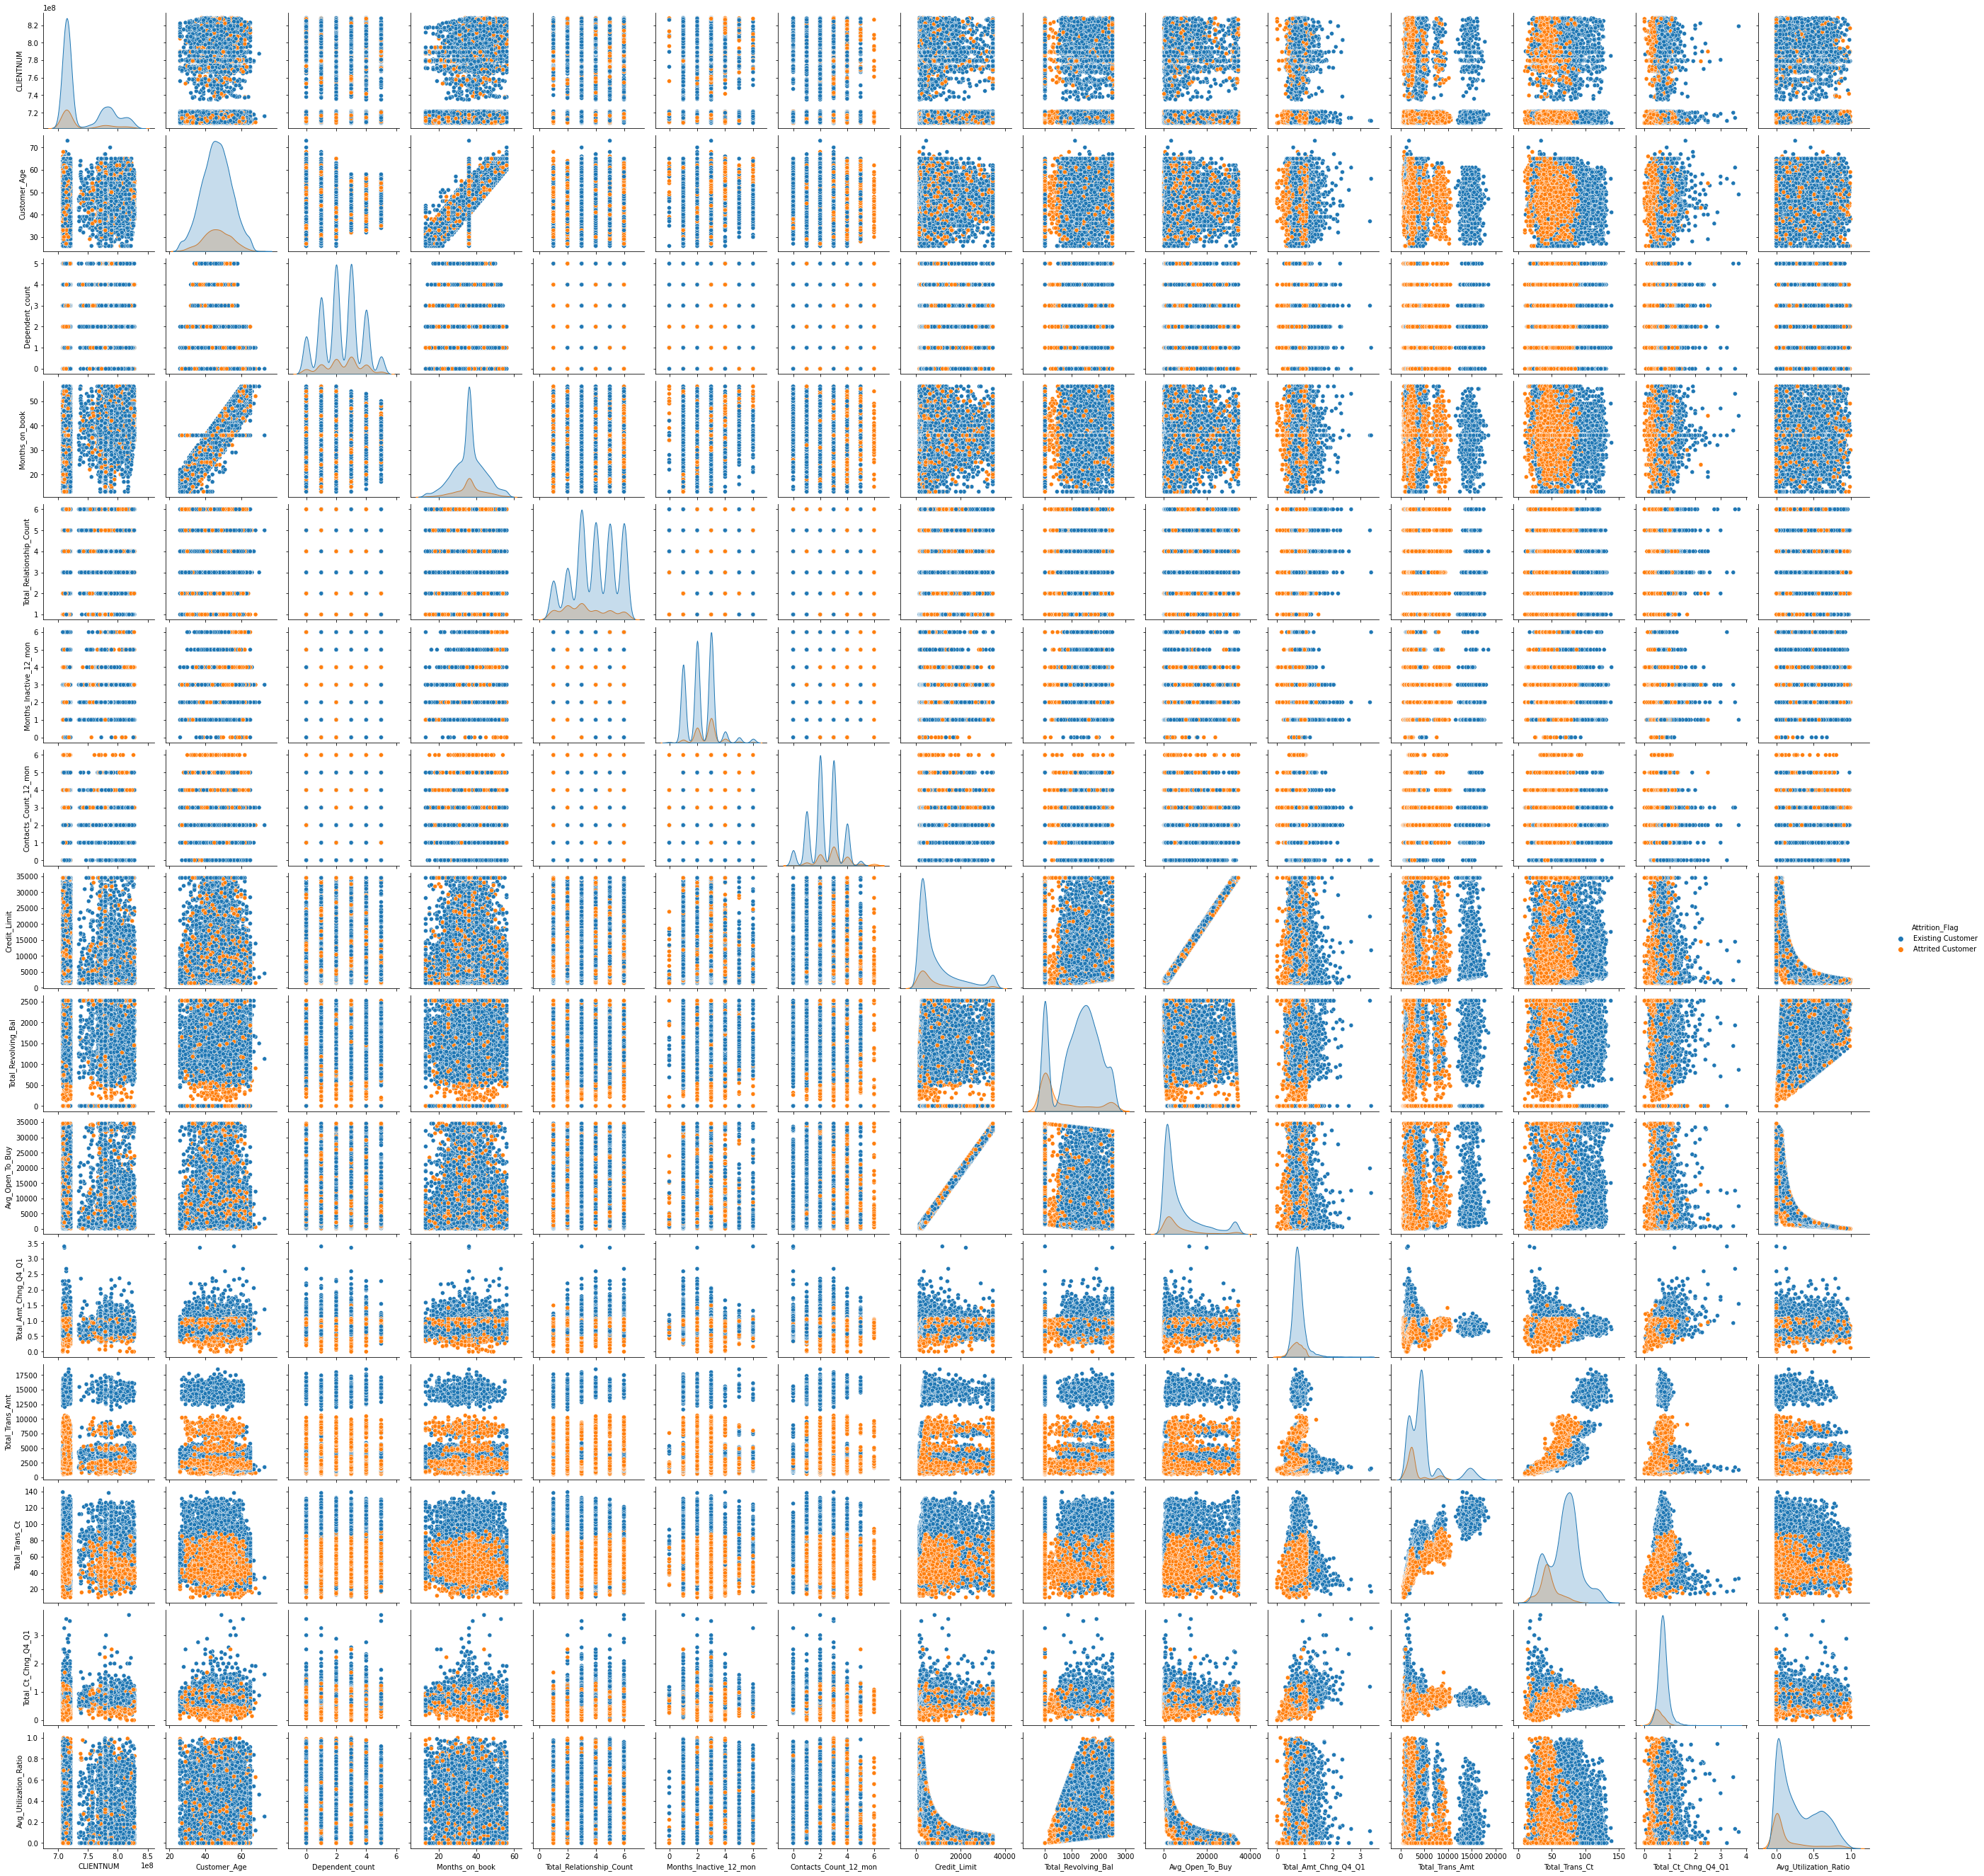

In [10]:
sns.pairplot(data=bank,hue='Attrition_Flag') # We are separating the data analysis based on the attribution flag as we know this is the variable we want to predict  

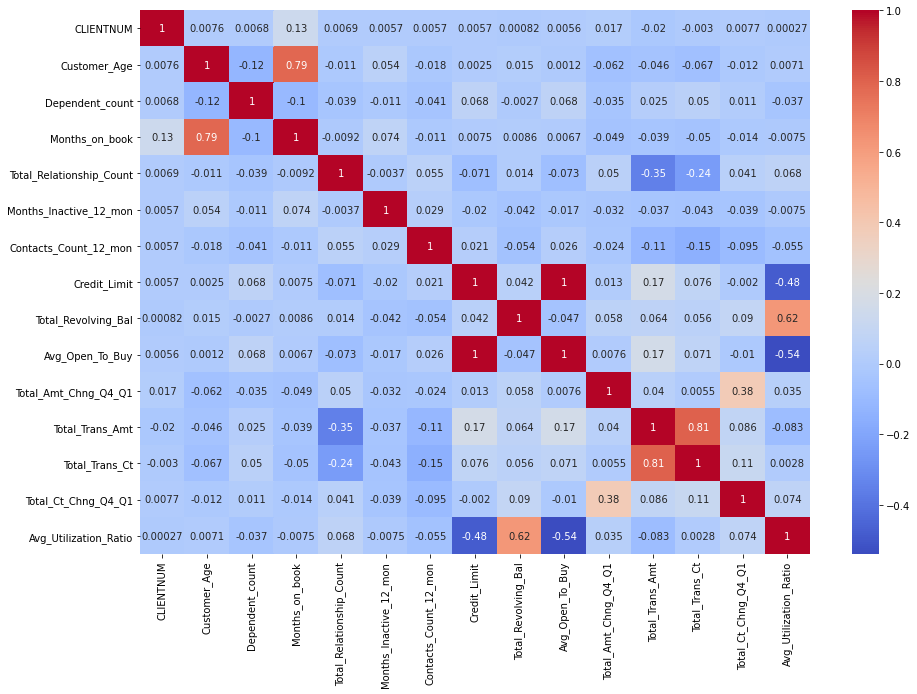

In [11]:
# Create a heatmap for correlation analysis
plt.figure(figsize=(15, 10))
sns.heatmap(bank.corr(), annot=True, cmap="coolwarm")

**Observations**


Months in the book and age look normally distributed. As well these two variables show a very clear relation line with a positive slope. Less clear but as well showing a positive slope, transaction counts, and amount. 
Total transaction counts, amount, total transaction change Q1 to Q4, revolving balance with lower values show like higher propensity to attrition. 
Credit limit and average utilization ratio are negatively related.

  
The interesting correlations we can call out below.     
Positive’s correlations:    
• Credit Limit and Open to Buy refers to the amount left on the credit card to use correlates 100%.  
• Total Transaction Amount and number correlates by 81%, it makes sense as it relates to the same records but different metric.    
• Customers' age to Period of relationship with the bank correlates 79%.      
• Revolving balance correlated with available credit the customer is spending by 62%.     
• The ratio of the total transactions amount and count correlates by 38%.        
• The rest of the positive correlations are lower values and so less relevant.      
    
Negative’s correlations:      
• Amount left on the credit card to use and how much of the available credit the customer spent correlates -54%.    
• The available credit the customer spent correlates to credit level -48%.      
• Total transaction amount and the total number of products held by the customer correlates -35%.      • Total transaction count and the total number of products held by the customer correlates -24%.    
• The rest of the negative correlations are lower in values and so not very interesting.       
   
Let check further the details through EDA.       


#### Univariable EDA

In [12]:
# While doing uni-variate analysis of numerical variables we want to study their central tendency 
# and dispersion.
# Let us write a function that will help us create boxplot and histogram for any input numerical 
# variable.
# This function takes the numerical column as the input and returns the boxplots 
# and histograms for the variable.
# Let us see if this help us write faster and cleaner code.
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,color = 'orange') if bins else sns.distplot(feature, kde=False, ax=ax_hist2,color='tab:cyan') # For histogram
    ax_hist2.axvline(np.mean(feature), color='purple', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

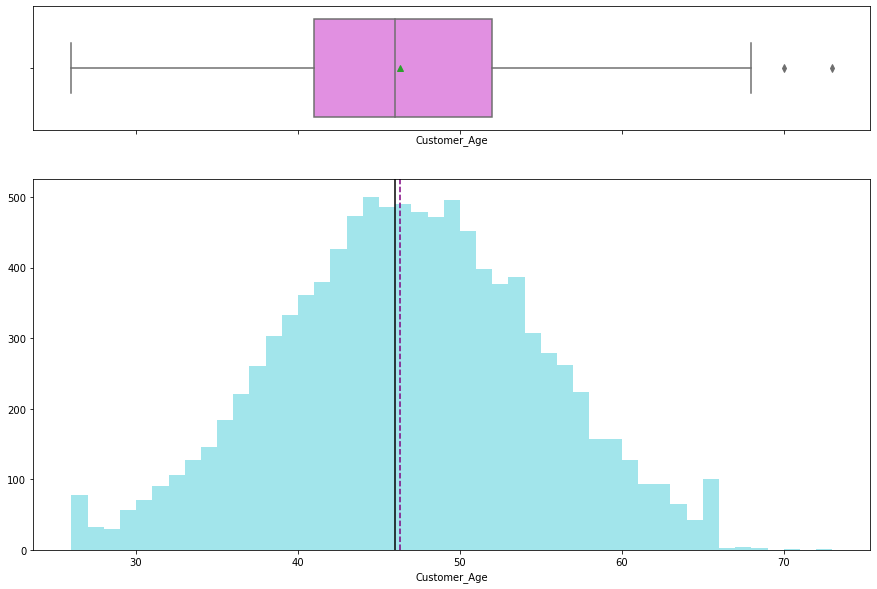

In [13]:
histogram_boxplot(bank.Customer_Age)

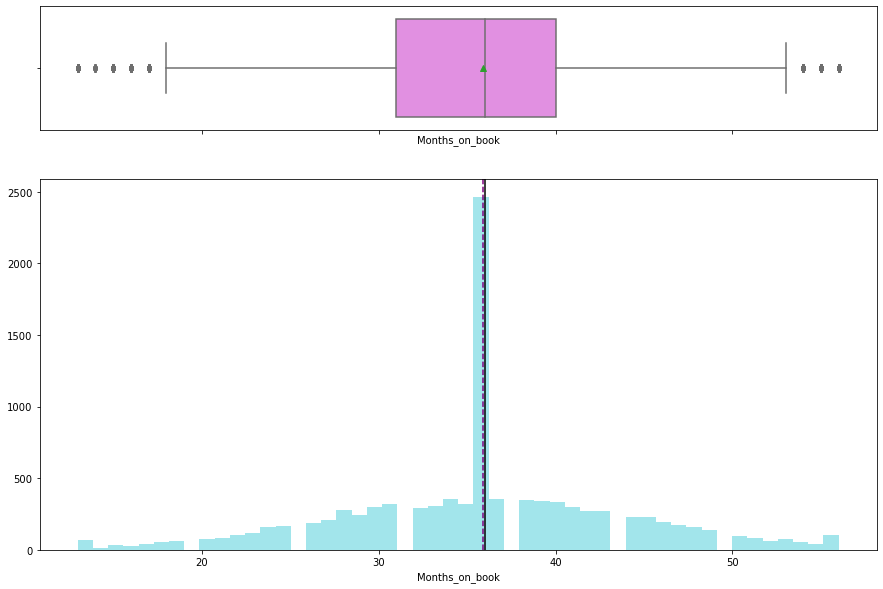

In [14]:
histogram_boxplot(bank.Months_on_book)

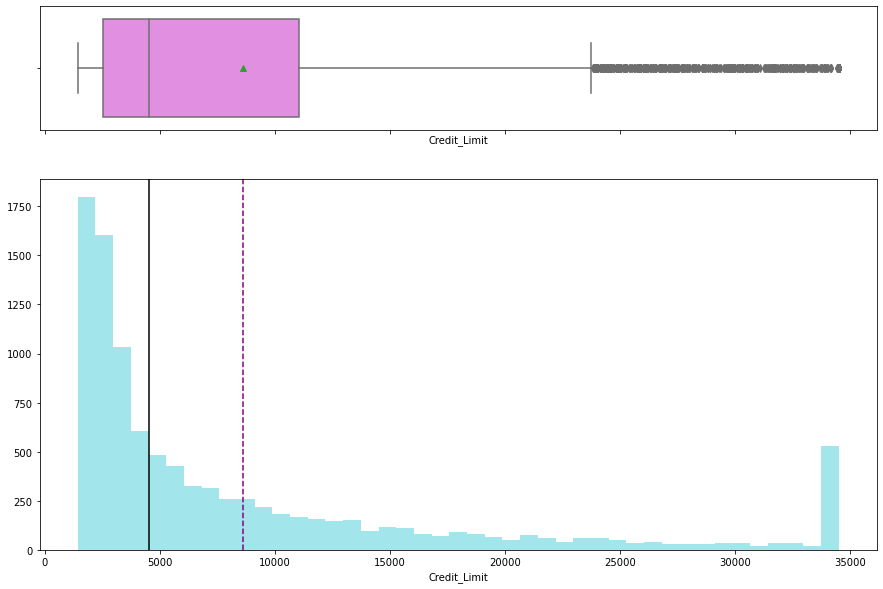

In [15]:
histogram_boxplot(bank.Credit_Limit)

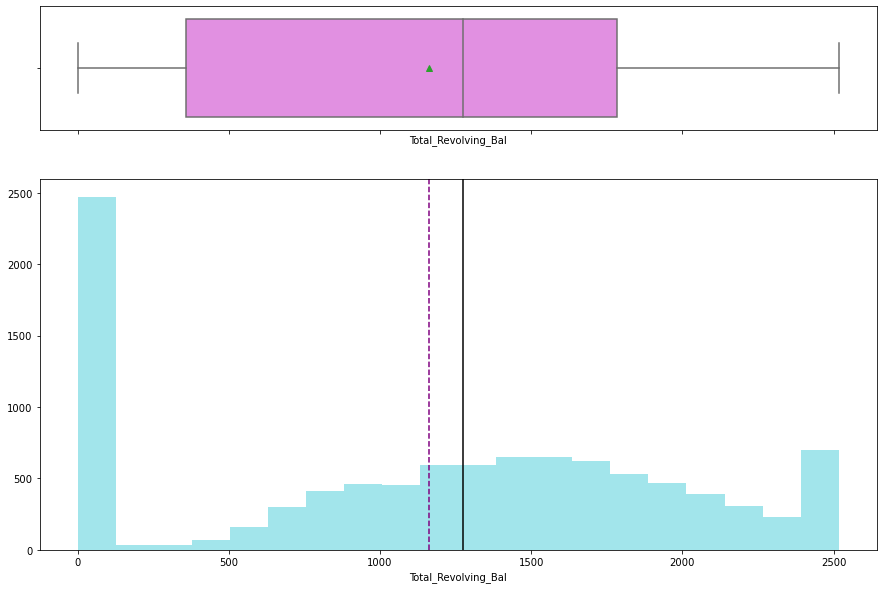

In [16]:
histogram_boxplot(bank.Total_Revolving_Bal)

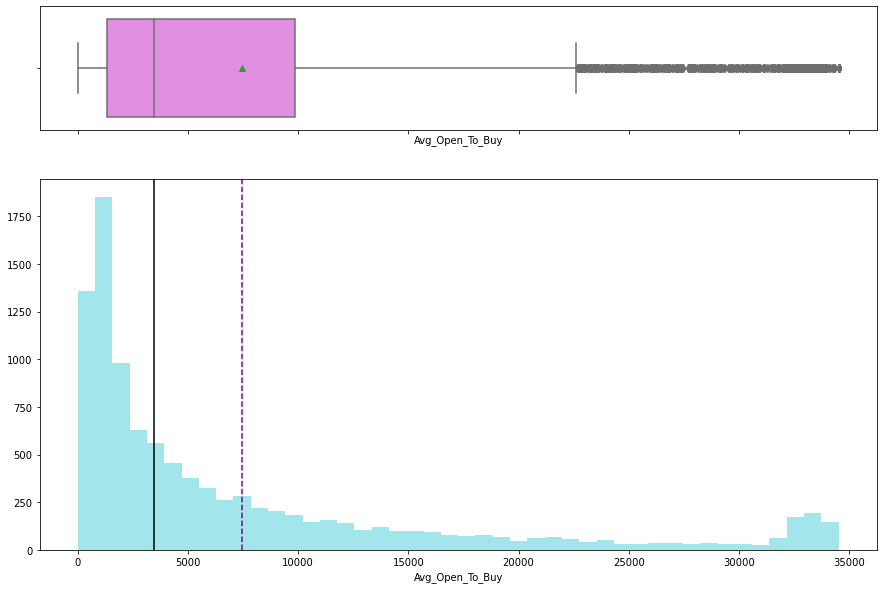

In [17]:
histogram_boxplot(bank.Avg_Open_To_Buy)

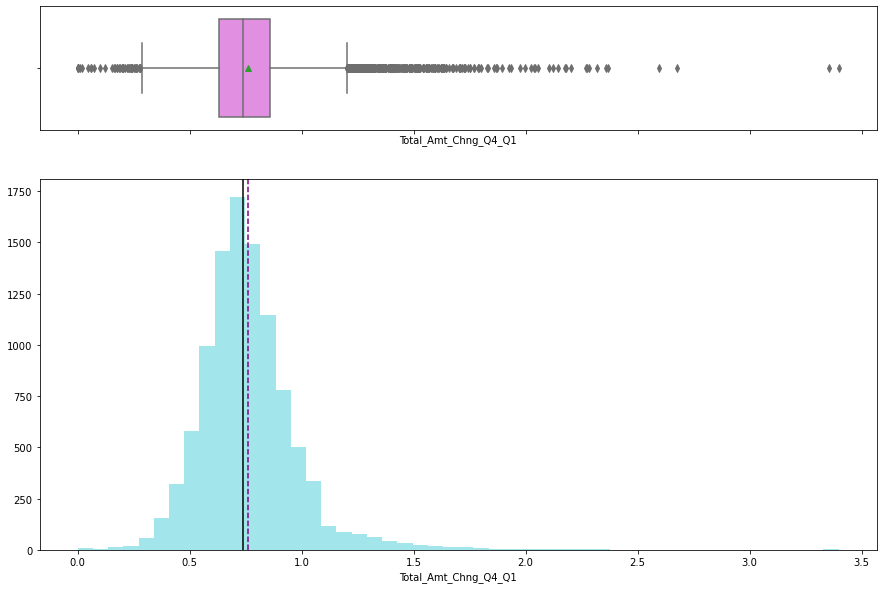

In [18]:
histogram_boxplot(bank.Total_Amt_Chng_Q4_Q1)

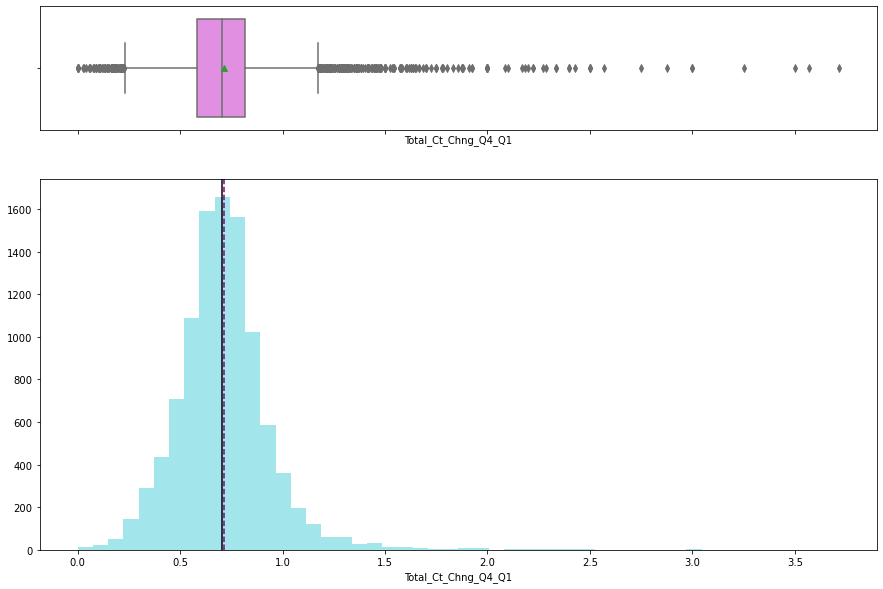

In [19]:
histogram_boxplot(bank.Total_Ct_Chng_Q4_Q1)

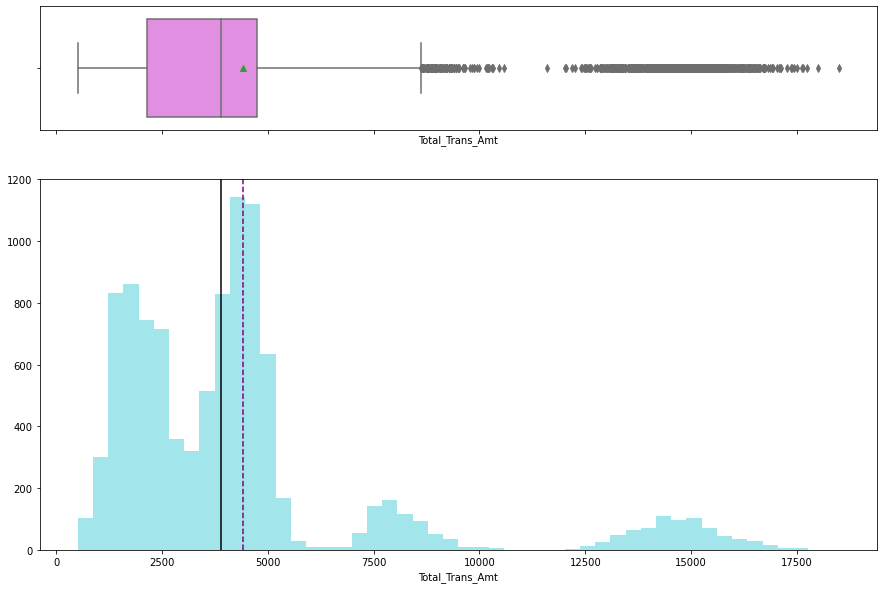

In [20]:
histogram_boxplot(bank.Total_Trans_Amt)

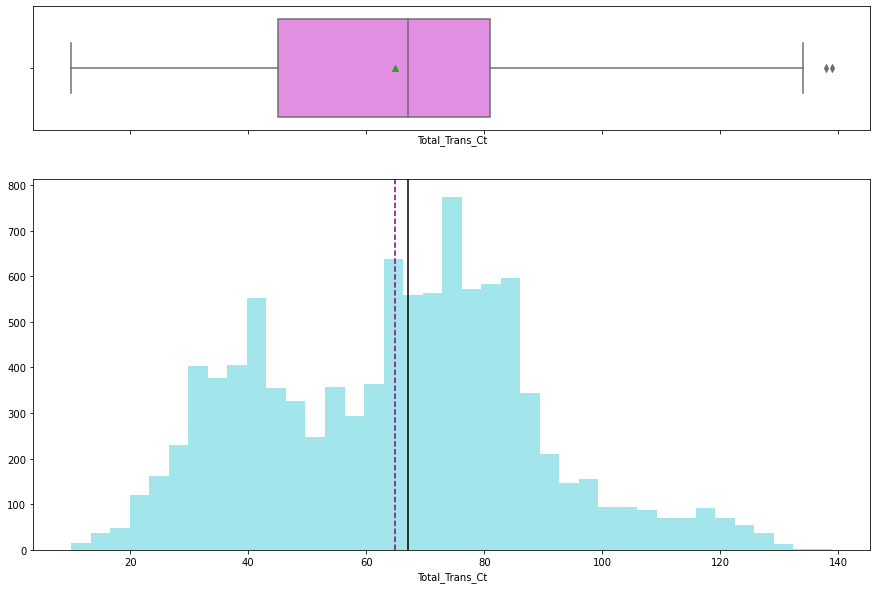

In [21]:
histogram_boxplot(bank.Total_Trans_Ct)

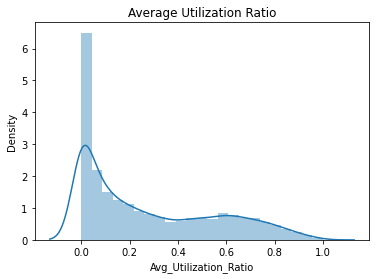

In [22]:
# As this is a value from 0 to 1 let use distplot for the analysis  

sns.distplot(bank.Avg_Utilization_Ratio)
plt.title("Average Utilization Ratio")
plt.show()

In [23]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(bank[z]) # length of the column
    plt.figure(figsize=(15,5))
    #plt.xticks(rotation=45)
    ax = sns.countplot(bank[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

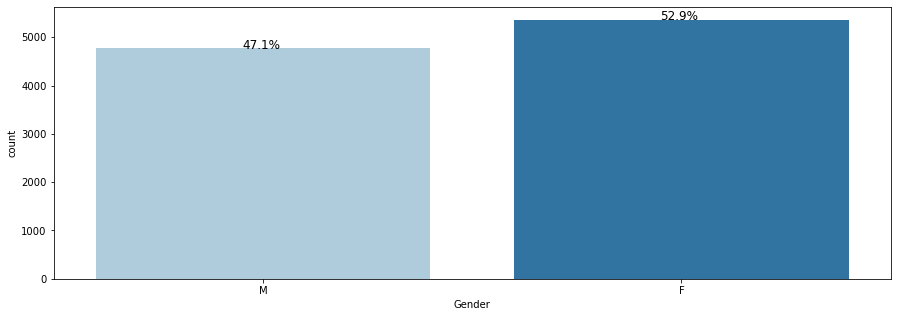

In [24]:
perc_on_bar('Gender')

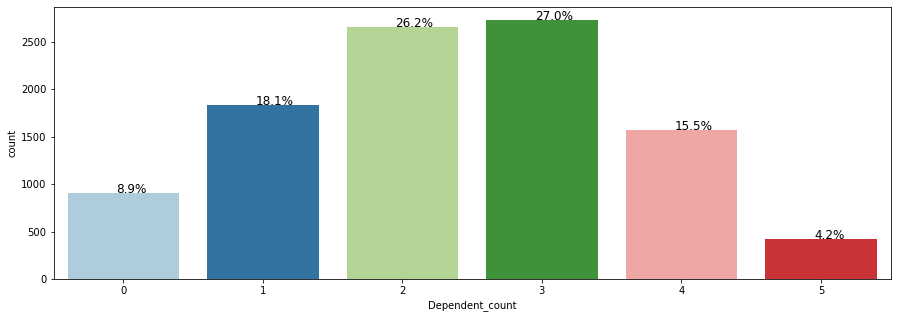

In [25]:
perc_on_bar('Dependent_count')

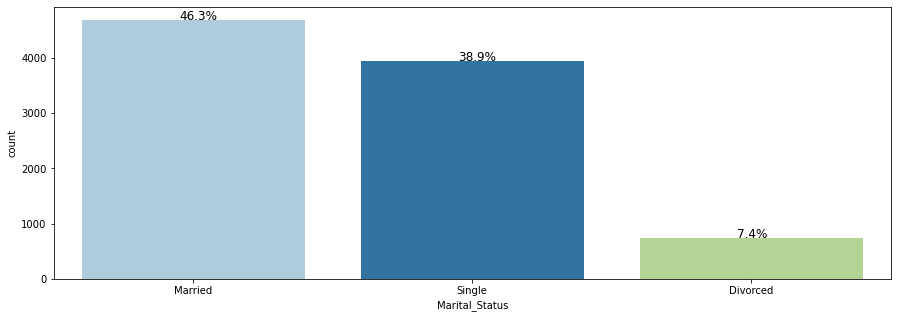

In [26]:
perc_on_bar('Marital_Status')

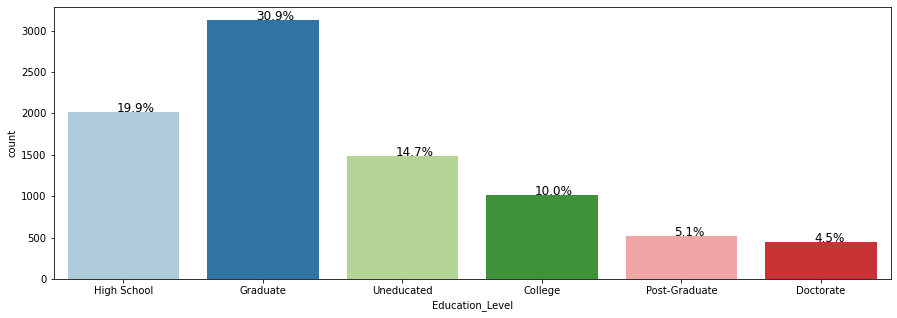

In [27]:
perc_on_bar('Education_Level')

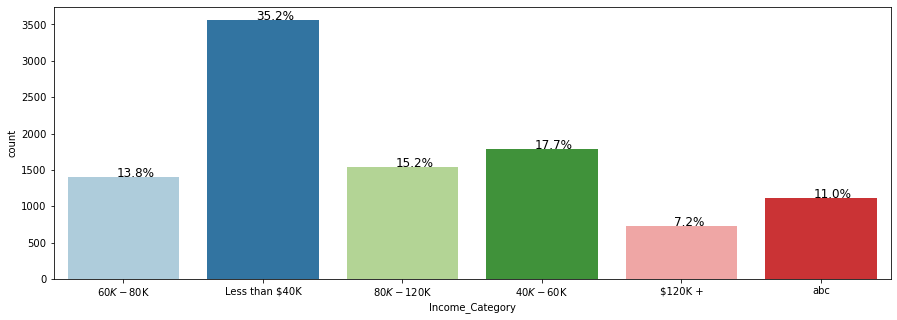

In [28]:
perc_on_bar('Income_Category')

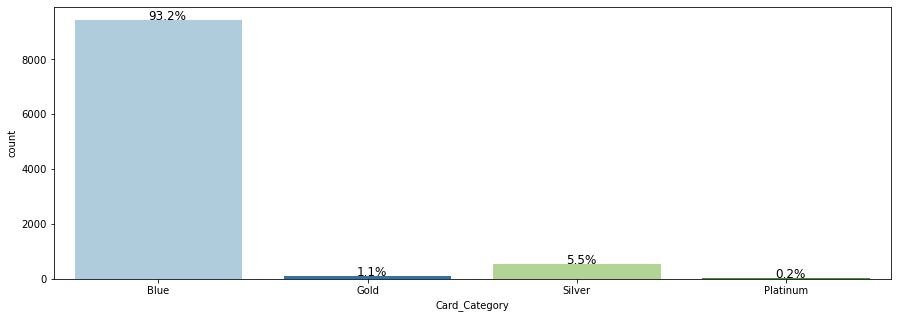

In [29]:
perc_on_bar('Card_Category')

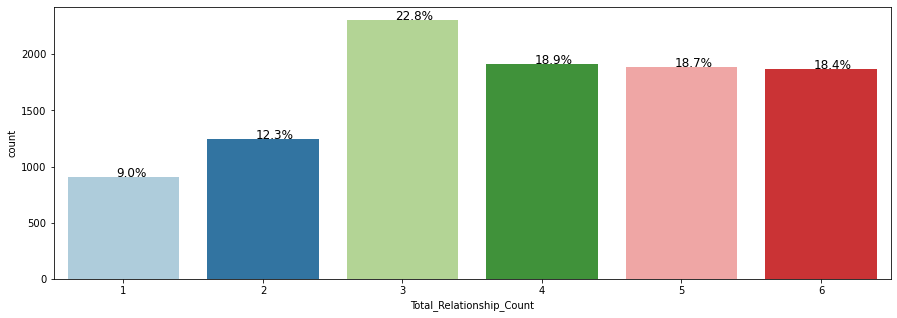

In [30]:
perc_on_bar('Total_Relationship_Count')

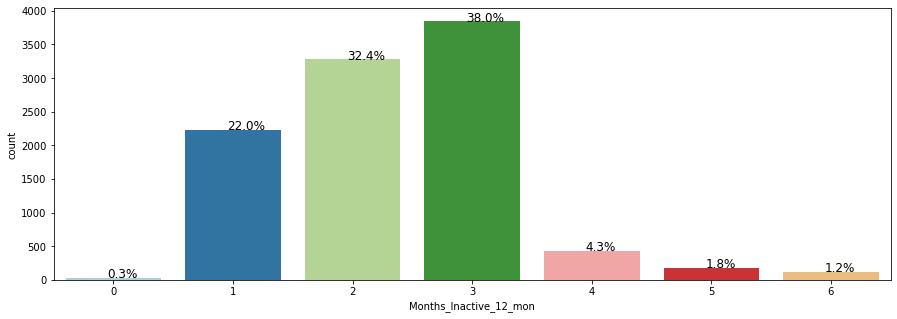

In [31]:
perc_on_bar('Months_Inactive_12_mon')

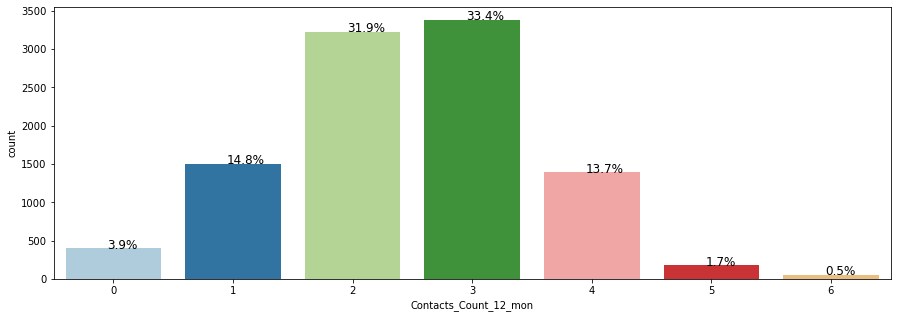

In [32]:
perc_on_bar('Contacts_Count_12_mon')

#### Bivariable and Multivariable EDA

In [33]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Attrition_Flag  Attrited Customer  Existing Customer    All
Card_Category                                              
All                          1627               8500  10127
Blue                         1519               7917   9436
Silver                         82                473    555
Gold                           21                 95    116
Platinum                        5                 15     20
------------------------------------------------------------------------------------------------------------------------


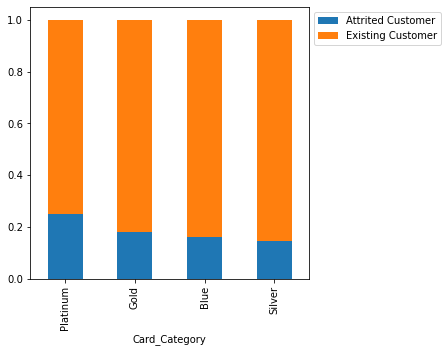

In [34]:
stacked_barplot(bank, "Card_Category", "Attrition_Flag" ) # the focus is the attrition flag as we are going to predict it 

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


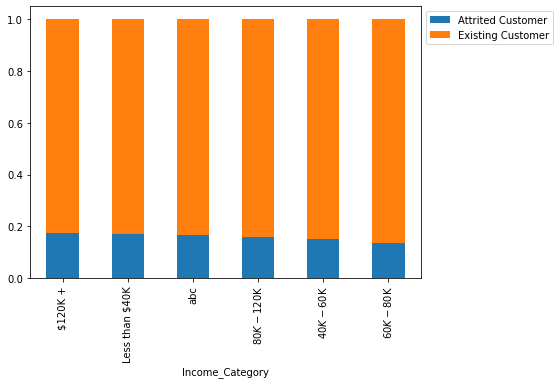

In [35]:
stacked_barplot(bank, "Income_Category", "Attrition_Flag" ) # the focus is the attrition flag as we are going to predict it 

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


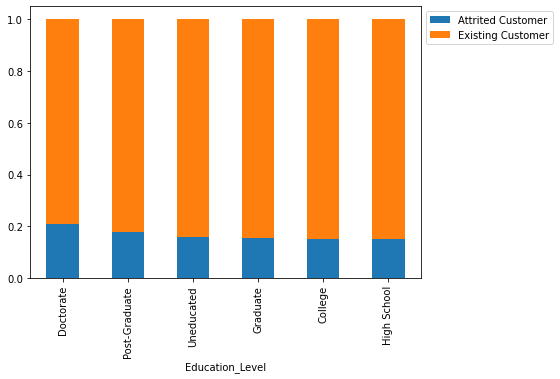

In [36]:
stacked_barplot(bank, "Education_Level", "Attrition_Flag" ) # the focus is the attrition flag as we are going to predict it 

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


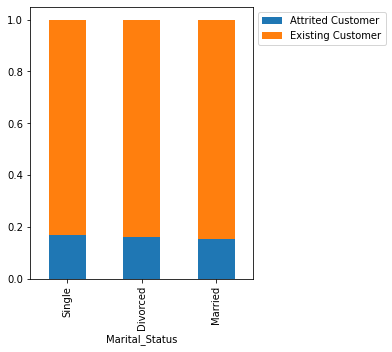

In [37]:
stacked_barplot(bank, "Marital_Status", "Attrition_Flag" ) # the focus is the attrition flag as we are going to predict it 

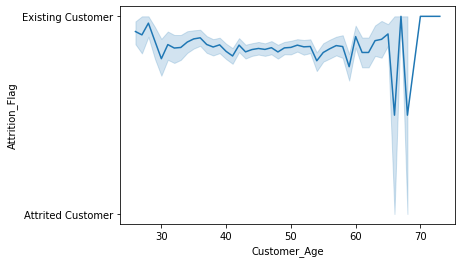

In [38]:
sns.lineplot(x='Customer_Age',y='Attrition_Flag',data=bank) # how age relates to the attrition

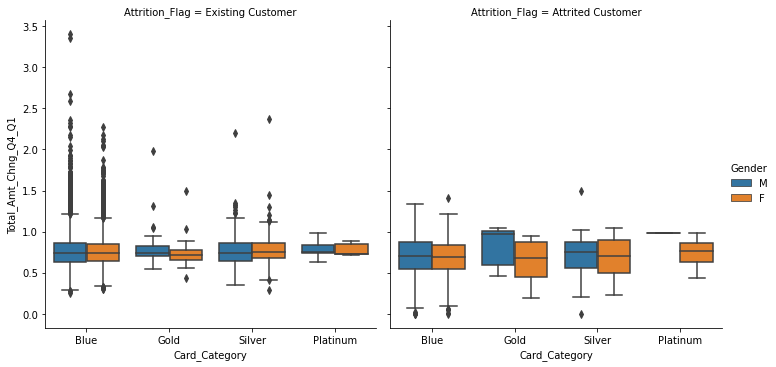

In [39]:
# Checking deeper the credit card of the customer base
# Look for a clue about segmentation and relationships 
# what impacts the attrition?

sns.catplot(x="Card_Category",
               y = "Total_Amt_Chng_Q4_Q1",
               hue="Gender", 
               col="Attrition_Flag", 
               data=bank, 
               kind="box");

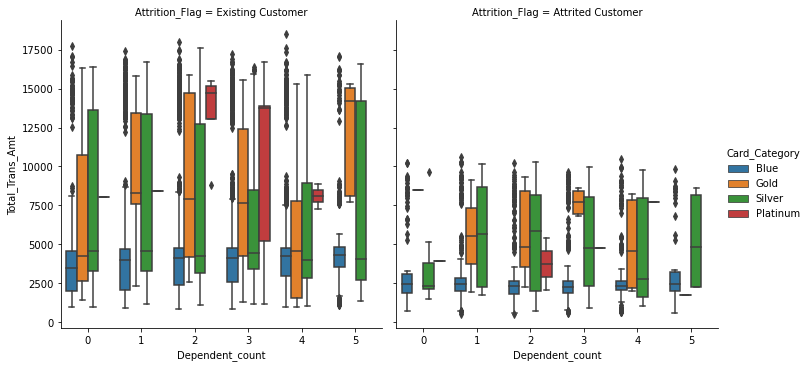

In [40]:
# Checking deeper the credit card and the customer base
# Look for a clue about segmentation and relationships 
# what impacts the attrition?

sns.catplot(x="Dependent_count",
               y = "Total_Trans_Amt",
               hue="Card_Category", 
               col="Attrition_Flag", 
               data=bank, 
               kind="box");

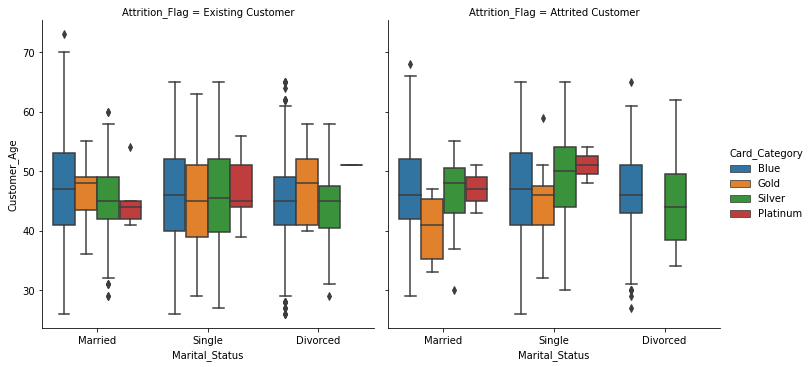

In [41]:
# Checking deeper the credit card and the customer base
# Look for a clue about segmentation and relationships 
# what impacts the attrition?

sns.catplot(x="Marital_Status",
               y = "Customer_Age",
               hue="Card_Category", 
               col="Attrition_Flag", 
               data=bank, 
               kind="box");

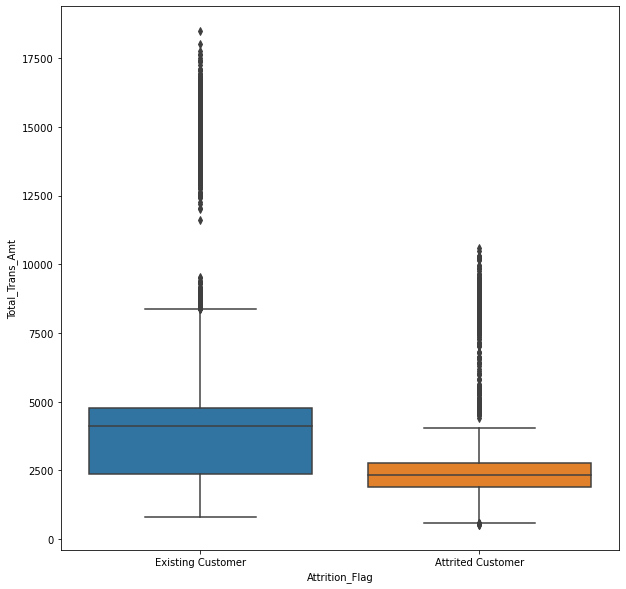

In [42]:
# Does the usage impacts attrition ? 
plt.figure(figsize=(10,10))
sns.boxplot(y='Total_Trans_Amt',x='Attrition_Flag',data=bank)
plt.show()

<Figure size 4320x4320 with 0 Axes>

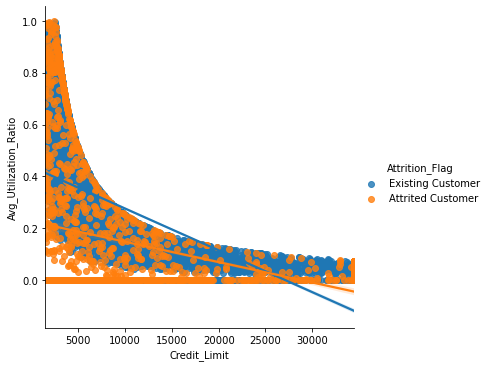

In [43]:
# Check Credit limit and average utilization ratio correlation in the context of attrition

plt.figure(figsize=(60, 60))
 

sns.lmplot (data= bank , y="Avg_Utilization_Ratio", x="Credit_Limit", hue="Attrition_Flag" , fit_reg =True);
plt.show()

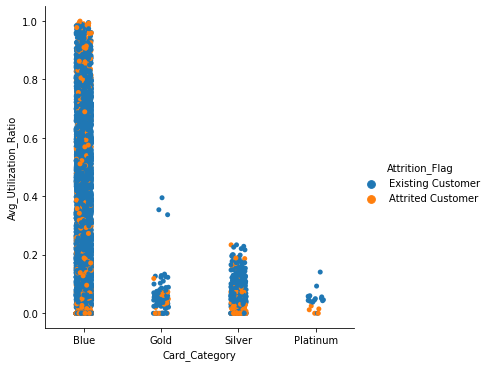

In [44]:
# Let check the Averrage utilization ratio per credit card type in the context of attrition
sns.catplot(data = bank, x='Card_Category', y ='Avg_Utilization_Ratio' , hue='Attrition_Flag', jitter=True);
plt.show()

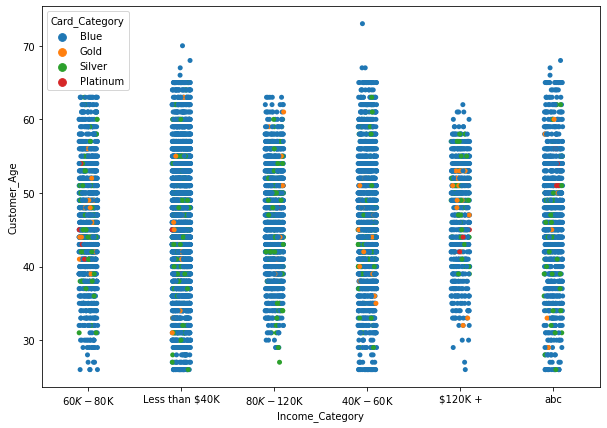

In [45]:
# Let check the age and credit card usage by credit card type
plt.figure(figsize=(10, 7))
sns.stripplot(y="Customer_Age", x="Income_Category", hue="Card_Category", data=bank)


We can see higher-income customers slightly being older and having more non-Blue Type credit cards, so let go deeper into customer profiling by credit card type.
 

In [46]:
bank[(bank['Card_Category']=='Blue') & (bank['Attrition_Flag']=='Attrited Customer')].describe(include='all').T

count unique                top  freq         mean  \
CLIENTNUM                 1519    NaN                NaN   NaN  7.34892e+08   
Attrition_Flag            1519      1  Attrited Customer  1519          NaN   
Customer_Age              1519    NaN                NaN   NaN      46.6623   
Gender                    1519      2                  F   890          NaN   
Dependent_count           1519    NaN                NaN   NaN      2.39368   
Education_Level           1276      6           Graduate   450          NaN   
Marital_Status            1399      3            Married   674          NaN   
Income_Category           1519      6     Less than $40K   586          NaN   
Card_Category             1519      1               Blue  1519          NaN   
Months_on_book            1519    NaN                NaN   NaN      36.2001   
Total_Relationship_Count  1519    NaN                NaN   NaN       3.2923   
Months_Inactive_12_mon    1519    NaN                NaN   NaN      2.69717   
Contacts_Count_12_mon     1519    NaN                NaN   NaN      2.96774   
Credit_Limit              1519    NaN                NaN   NaN      6817.75   
Total_Revolving_Bal       1519    NaN                NaN   NaN      669.036   
Avg_Open_To_Buy           1519    NaN                NaN   NaN      6148.71   
Total_Amt_Chng_Q4_Q1      1519    NaN                NaN   NaN     0.692305   
Total_Trans_Amt           1519    NaN                NaN   NaN      2954.16   
Total_Trans_Ct            1519    NaN                NaN   NaN      44.2265   
Total_Ct_Chng_Q4_Q1       1519    NaN                NaN   NaN     0.550356   
Avg_Utilization_Ratio     1519    NaN                NaN   NaN      0.17174   

                                  std          min          25%          50%  \
CLIENTNUM                 3.53153e+07  7.08083e+08  7.12311e+08  7.16426e+08   
Attrition_Flag                    NaN          NaN          NaN          NaN   
Customer_Age                  7.69818           26           41           47   
Gender                            NaN          NaN          NaN          NaN   
Dependent_count               1.27161            0            1            2   
Education_Level                   NaN          NaN          NaN          NaN   
Marital_Status                    NaN          NaN          NaN          NaN   
Income_Category                   NaN          NaN          NaN          NaN   
Card_Category                     NaN          NaN          NaN          NaN   
Months_on_book                7.82959           13           32           36   
Total_Relationship_Count      1.56927            1            2            3   
Months_Inactive_12_mon       0.903331            0            2            3   
Contacts_Count_12_mon         1.08633            0            2            3   
Credit_Limit                  7470.19       1438.3       2004.5         3841   
Total_Revolving_Bal           922.333            0            0            0   
Avg_Open_To_Buy               7500.49            3       1520.5         3157   
Total_Amt_Chng_Q4_Q1         0.212563            0        0.544        0.698   
Total_Trans_Amt               2180.36          510         1896         2314   
Total_Trans_Ct                14.1383           10           37           43   
Total_Ct_Chng_Q4_Q1          0.225738            0          0.4        0.524   
Avg_Utilization_Ratio        0.271031            0            0            0   

                                  75%          max  
CLIENTNUM                 7.67611e+08  8.28295e+08  
Attrition_Flag                    NaN          NaN  
Customer_Age                       52           68  
Gender                            NaN          NaN  
Dependent_count                     3            5  
Education_Level                   NaN          NaN  
Marital_Status                    NaN          NaN  
Income_Category                   NaN          NaN  
Card_Category                     NaN          N

In [47]:
bank[(bank['Card_Category']=='Silver') & (bank['Attrition_Flag']=='Attrited Customer')].describe(include='all').T

count unique                top freq         mean  \
CLIENTNUM                   82    NaN                NaN  NaN  7.44345e+08   
Attrition_Flag              82      1  Attrited Customer   82          NaN   
Customer_Age                82    NaN                NaN  NaN      47.1585   
Gender                      82      2                  M   54          NaN   
Dependent_count             82    NaN                NaN  NaN      2.53659   
Education_Level             73      6           Graduate   28          NaN   
Marital_Status              77      3             Single   43          NaN   
Income_Category             82      6       $80K - $120K   22          NaN   
Card_Category               82      1             Silver   82          NaN   
Months_on_book              82    NaN                NaN  NaN      36.3659   
Total_Relationship_Count    82    NaN                NaN  NaN      3.13415   
Months_Inactive_12_mon      82    NaN                NaN  NaN      2.64634   
Contacts_Count_12_mon       82    NaN                NaN  NaN      3.03659   
Credit_Limit                82    NaN                NaN  NaN      25960.3   
Total_Revolving_Bal         82    NaN                NaN  NaN      677.244   
Avg_Open_To_Buy             82    NaN                NaN  NaN        25283   
Total_Amt_Chng_Q4_Q1        82    NaN                NaN  NaN     0.705915   
Total_Trans_Amt             82    NaN                NaN  NaN      4899.68   
Total_Trans_Ct              82    NaN                NaN  NaN      53.2805   
Total_Ct_Chng_Q4_Q1         82    NaN                NaN  NaN     0.613012   
Avg_Utilization_Ratio       82    NaN                NaN  NaN     0.032439   

                                  std          min          25%         50%  \
CLIENTNUM                 3.95318e+07  7.08386e+08  7.12961e+08  7.1864e+08   
Attrition_Flag                    NaN          NaN          NaN         NaN   
Customer_Age                  7.47088           30        42.25          48   
Gender                            NaN          NaN          NaN         NaN   
Dependent_count               1.33514            0            2           3   
Education_Level                   NaN          NaN          NaN         NaN   
Marital_Status                    NaN          NaN          NaN         NaN   
Income_Category                   NaN          NaN          NaN         NaN   
Card_Category                     NaN          NaN          NaN         NaN   
Months_on_book                7.72124           18           33          36   
Total_Relationship_Count      1.72678            1            2           3   
Months_Inactive_12_mon       0.921244            0            2           3   
Contacts_Count_12_mon         1.11605            1            2           3   
Credit_Limit                  10054.8         3735        14890       33092   
Total_Revolving_Bal           894.665            0            0         184   
Avg_Open_To_Buy               10072.9         3735      14023.8       31999   
Total_Amt_Chng_Q4_Q1         0.243992            0      0.55225      0.7335   
Total_Trans_Amt               3140.82          691       1929.5        4753   
Total_Trans_Ct                17.4973           14           41        50.5   
Total_Ct_Chng_Q4_Q1            0.2494            0      0.43475       0.591   
Avg_Utilization_Ratio       0.0517945            0            0       0.005   

                                  75%          max  
CLIENTNUM                 7.86054e+08  8.26246e+08  
Attrition_Flag                    NaN          NaN  
Customer_Age                       52           65  
Gender                            NaN          NaN  
Dependent_count                  3.75            5  
Education_Level                   NaN          NaN  
Marital_Status                    NaN          NaN  
Income_Category                   NaN          NaN  
Card_Category                     NaN          NaN  
Months_on_book                  42.75  

In [48]:
bank[(bank['Card_Category']=='Gold') & (bank['Attrition_Flag']=='Attrited Customer')].describe(include='all').T

count unique                top freq         mean  \
CLIENTNUM                   21    NaN                NaN  NaN  7.31792e+08   
Attrition_Flag              21      1  Attrited Customer   21          NaN   
Customer_Age                21    NaN                NaN  NaN      43.8571   
Gender                      21      2                  M   13          NaN   
Dependent_count             21    NaN                NaN  NaN      2.57143   
Education_Level             17      6           Graduate    6          NaN   
Marital_Status              17      2             Single   11          NaN   
Income_Category             21      6        $60K - $80K    6          NaN   
Card_Category               21      1               Gold   21          NaN   
Months_on_book              21    NaN                NaN  NaN      33.9048   
Total_Relationship_Count    21    NaN                NaN  NaN      3.04762   
Months_Inactive_12_mon      21    NaN                NaN  NaN      2.61905   
Contacts_Count_12_mon       21    NaN                NaN  NaN            3   
Credit_Limit                21    NaN                NaN  NaN      29878.5   
Total_Revolving_Bal         21    NaN                NaN  NaN         1027   
Avg_Open_To_Buy             21    NaN                NaN  NaN      28851.5   
Total_Amt_Chng_Q4_Q1        21    NaN                NaN  NaN     0.769905   
Total_Trans_Amt             21    NaN                NaN  NaN      5841.81   
Total_Trans_Ct              21    NaN                NaN  NaN      59.8571   
Total_Ct_Chng_Q4_Q1         21    NaN                NaN  NaN     0.619048   
Avg_Utilization_Ratio       21    NaN                NaN  NaN    0.0362857   

                                  std         min          25%          50%  \
CLIENTNUM                 3.77801e+07  7.0837e+08  7.12509e+08  7.15646e+08   
Attrition_Flag                    NaN         NaN          NaN          NaN   
Customer_Age                  6.22323          32           41           44   
Gender                            NaN         NaN          NaN          NaN   
Dependent_count                1.2873           0            2            2   
Education_Level                   NaN         NaN          NaN          NaN   
Marital_Status                    NaN         NaN          NaN          NaN   
Income_Category                   NaN         NaN          NaN          NaN   
Card_Category                     NaN         NaN          NaN          NaN   
Months_on_book                6.15552          20           32           36   
Total_Relationship_Count      1.68749           1            2            2   
Months_Inactive_12_mon       0.589592           1            2            3   
Contacts_Count_12_mon          1.3784           1            2            3   
Credit_Limit                  7832.31       15109        23981        34516   
Total_Revolving_Bal           1009.46           0            0          897   
Avg_Open_To_Buy               7757.52       13640        23981        32315   
Total_Amt_Chng_Q4_Q1         0.255882       0.196        0.591        0.858   
Total_Trans_Amt               2836.81        1727         2315         6782   
Total_Trans_Ct                14.4024          34           47           64   
Total_Ct_Chng_Q4_Q1          0.200502       0.214        0.478         0.65   
Avg_Utilization_Ratio       0.0354516           0            0        0.032   

                                  75%          max  
CLIENTNUM                 7.19875e+08  8.17607e+08  
Attrition_Flag                    NaN          NaN  
Customer_Age                       47           59  
Gender                            NaN          NaN  
Dependent_count                     4            5  
Education_Level                   NaN          NaN  
Marital_Status                    NaN          NaN  
Income_Category                   NaN          NaN  
Card_Category                     NaN          NaN  
Months_on_book                     36  

In [49]:
bank[(bank['Card_Category']=='Platinum') & (bank['Attrition_Flag']=='Attrited Customer')].describe(include='all').T

count unique                top freq         mean  \
CLIENTNUM                    5    NaN                NaN  NaN  7.13063e+08   
Attrition_Flag               5      1  Attrited Customer    5          NaN   
Customer_Age                 5    NaN                NaN  NaN         49.4   
Gender                       5      2                  F    4          NaN   
Dependent_count              5    NaN                NaN  NaN          2.2   
Education_Level              5      3           Graduate    3          NaN   
Marital_Status               5      2             Single    3          NaN   
Income_Category              5      3     Less than $40K    2          NaN   
Card_Category                5      1           Platinum    5          NaN   
Months_on_book               5    NaN                NaN  NaN           36   
Total_Relationship_Count     5    NaN                NaN  NaN          2.8   
Months_Inactive_12_mon       5    NaN                NaN  NaN          2.6   
Contacts_Count_12_mon        5    NaN                NaN  NaN          3.2   
Credit_Limit                 5    NaN                NaN  NaN      24997.4   
Total_Revolving_Bal          5    NaN                NaN  NaN        263.4   
Avg_Open_To_Buy              5    NaN                NaN  NaN        24734   
Total_Amt_Chng_Q4_Q1         5    NaN                NaN  NaN       0.7848   
Total_Trans_Amt              5    NaN                NaN  NaN       4755.8   
Total_Trans_Ct               5    NaN                NaN  NaN         60.2   
Total_Ct_Chng_Q4_Q1          5    NaN                NaN  NaN       0.5456   
Avg_Utilization_Ratio        5    NaN                NaN  NaN       0.0104   

                                  std          min         25%          50%  \
CLIENTNUM                 4.23802e+06  7.08655e+08  7.0932e+08  7.14078e+08   
Attrition_Flag                    NaN          NaN         NaN          NaN   
Customer_Age                  4.15933           43          48           51   
Gender                            NaN          NaN         NaN          NaN   
Dependent_count               1.48324            0           2            2   
Education_Level                   NaN          NaN         NaN          NaN   
Marital_Status                    NaN          NaN         NaN          NaN   
Income_Category                   NaN          NaN         NaN          NaN   
Card_Category                     NaN          NaN         NaN          NaN   
Months_on_book                4.52769           31          32           37   
Total_Relationship_Count      1.30384            2           2            2   
Months_Inactive_12_mon       0.547723            2           2            3   
Contacts_Count_12_mon         0.83666            2           3            3   
Credit_Limit                  9281.91        15987       15987        23981   
Total_Revolving_Bal           284.588            0           0          193   
Avg_Open_To_Buy               9212.95        15794       15987        23388   
Total_Amt_Chng_Q4_Q1         0.229779        0.435       0.695        0.827   
Total_Trans_Amt               2073.95         2021        3901         4758   
Total_Trans_Ct                10.0349           46          54           65   
Total_Ct_Chng_Q4_Q1          0.148193        0.394       0.421        0.512   
Avg_Utilization_Ratio       0.0106442            0           0        0.012   

                                  75%          max  
CLIENTNUM                 7.14191e+08  7.19071e+08  
Attrition_Flag                    NaN          NaN  
Customer_Age                       51           54  
Gender                            NaN          NaN  
Dependent_count                     3            4  
Education_Level                   NaN          NaN  
Marital_Status                    NaN          NaN  
Income_Category                   NaN          NaN  
Card_Category                     NaN          NaN  
Months_on_book                     38  

**Observations**

Based on the univariable, bivariable, and multivariable analysis the below are some takeaways. 

Variables having outliers below but we will need to test all possible outliers properly during the preprocessing phase :
  
  
•	Customer_Age   
•	Months_on_book  
•	Credit_Limit  
•	Avg_Open_To_Buy  
•	Total_Amt_Chng_Q4_Q1   
•	Total_Trans_Amt   
•	Total_Trans_Ct   
•	Total_Ct_Chng_Q4_Q1   
  
We are not indicating again the average and median values as we have done this before.  
Age is normally distributed but having a couple of outliers. The median and the average are almost the same as mentioned in a previous section.   
Months in the book is having low and high outliers. Many are having the value is zero, it looks like a pattern but it's not clear what the root cause is.    
The credit limit is right-skewed having some significant high outliers.    
Resolving average shows plenty of non-activity with zero values, ~25% of the customers.     
Average Open to Buy shows a right-skewed diagram with high outliers.    
Total Count and Amount Change from Q4 to Q1 shows a close to normal distribution but outliers are more at the high rather than the lower end.   
Total Transaction Amount show distribution picks and high-end outliers, this can indicate segments behaving differently.    
Total Transaction Count shows fewer clear picks compare to the Total Transaction Amount and fewer high outliers.     
The average Utilization Ratio shows many customers not using or giving a low usage to the credit card. It's right-skewed.   
Gender distribution is almost equal.   
More than half of the customers have 2 or 3 dependents, and almost ~20% are having 4 or 5. So, which can indicate many customers have families.    
And we can observe yes, ~46% are married and ~7% divorced so it reinforced the above statement.   
Like 2/3 of the customer have some type of higher education.    
Income, like ~30% is in the middle range of 40 to 80K USD, and ~35% being below 40K USD. As well we have a significant number of values to fix: 11% being "abc".    
Only a very few customers (>2%) have upgraded credit cards: Platinum and gold type. ~93% have a blue type and 5.5% upgraded to silver type.    
~23% of the customers are holding 3 products and ~56% are holding 4, 5, and 6 equally distributed. 1 or 2 products holding is a less common event.     
We can observe more than ~90% of the customers have been inactive for less than 4 months.    
The number of customers contacts with the bank during the last 12 months is mainly 2- and 3-times accounting for almost 2/3 of the customers.   
Attrition looks to have some high % with Platinum credit card or Doctorate’s customers.     
Marital status and income look like are not affecting the tendency to attrition.    
How does age look from an attribution perspective? We can observe high variance with older people, two big drops.   
The number of total amounts changes from Q4 to Q1 outliers for existing customers is higher. So as well we can observe variance. Gender it's not having an impact.   
Existing customers tend to have total transaction amount higher average and outliers.    
Credit limit and Average utilization Ratio are negatively correlated but it's not clear a difference related to attribution.    
Upgraded credit card type customers have a lower utilization ratio, but only Platinum credit card customers show a clear higher attribution rate.     
Let check closer the credit card type, it looks higher income are having age less distributed and higher % of upgraded credit card type.    
   
Customer attrition profiling based on credit card type:      
    
Blue credit cardholders: having ~2 dependents are graduated and married earning less the 40K USD per year. Most of the numeric values average and mean are very similar to the population, and it makes sense as it represents ~98% of the attritions. Utilization ratio ~17%.    
Silver credit cardholders: having ~2.5 to 3 dependents who are graduated but single and having a higher income. The number of dependents probably indicates helping parents or brothers/ sisters if they are single. The key point is the average total transaction amount is ~5K vs. ~3k USD. So these are more profitable customers. As well utilization ratio is ~32%, it’s higher vs. the blue credit card type.     
Gold credit cardholders: the average age is younger with ~43 years old having ~2 to ~2.5 dependents and having higher income vs. blue card type. Most of them are graduated and single, so probably as well they help the parents or brothers/ sisters. The total transaction amount is similar to the blue silver cardholders, a little less than  ~5K USD. But utilization ratio is slightly higher vs. Silver credit card type, ~36%.    
Platinum credit cardholders: they are very few, 5. The average age is higher with ~49 years old average having ~2 to 2.2 dependents. Most of them are graduated and single. The income is unknown. But we can see the Total transaction amount is as well almost ~5K USD. But the utilization ratio is the lowest, ~10%.    



### <a name='link4'> Data preprocessing  </a>

We will need to pre-process the dataset variables below to have the dataset ready for model building purposes. List and status tracking (Completed: YES/ NO) below.

Data dropping, imputation, and replacement: 

- Client number is not relevant and we can drop it  YES 

- Attrition_Flag , convert to number 0 or 1  YES 
- Gender , convert to number 0 or 1  YES 
- Education_Level , impute values  YES   
- Marital_Status , impute values YES  
- Income_Category , impute values YES  

Then take care of outliers:   
  
- Customer_Age  YES  
- Months_on_book  YES  
- Credit_Limit   YES  
- Avg_Open_To_Buy   YES     
- Total_Amt_Chng_Q4_Q1  YES    
- Total_Trans_Amt   YES  
- Total_Trans_Ct  YES   
- Total_Ct_Chng_Q4_Q1  YES 
- Months_Inactive_12_mon YES   	  
- Contacts_Count_12_mon     YES    

   
Last create dummies for the below categorical values :  

- Education_Level  	  YES   
- Marital_Status	   YES   
- Income_Category    YES
- Card_Category    YES


     

In [50]:
# Create another duplicate dataset for data preprocessing 
bank1 = bank.copy()
bank1.head ()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

#### Data dropping, imputation, and replacement

In [51]:
# Drop Customer number, it is not useful
bank1.drop(['CLIENTNUM'], axis=1, inplace=True)


In [52]:
# Let change Attrition Flag into a numerical value
bank1["Attrition_Flag"] = bank1["Attrition_Flag"].str.replace("Attrited Customer", "1").str.replace("Existing Customer", "0").astype(np.int64)

In [53]:
# Let change Gender into a numerical value
bank1["Gender"] = bank1["Gender"].str.replace("F", "1").str.replace("M", "0").astype(np.int64)

In [54]:
np.random.seed(1)  # To get the same random results to check the changes were successful
bank1.sample(n=20)

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
6498               0            43       1                2        Graduate   
9013               0            38       1                1         College   
2053               0            39       0                2         College   
3211               0            44       0                4        Graduate   
5559               1            38       1                2       Doctorate   
6106               0            54       0                3   Post-Graduate   
4150               1            53       1                3        Graduate   
2205               0            38       0                4        Graduate   
4145               0            43       0                1        Graduate   
5324               1            50       1                1       Doctorate   
7671               0            57       1                3         College   
2903               0            50       1                3     High School   
9924               0            49       1                4             NaN   
9251               0            35       0                3             NaN   
2675               0            32       1                1        Graduate   
7381               0            48       0                4     High School   
8660               0            44       0                4        Graduate   
7173               0            42       1                3        Graduate   
2844               0            62       1                1             NaN   
4427               0            39       1                4      Uneducated   

     Marital_Status Income_Category Card_Category  Months_on_book  \
6498        Married  Less than $40K          Blue              36   
9013            NaN  Less than $40K          Blue              32   
2053        Married     $60K - $80K          Blue              31   
3211        Married         $120K +          Blue              32   
5559        Married  Less than $40K          Blue              28   
6106         Single    $80K - $120K        Silver              42   
4150         Single     $40K - $60K          Blue              40   
2205        Married     $40K - $60K          Blue              27   
4145         Single     $60K - $80K        Silver              31   
5324         Single             abc          Blue              46   
7671            NaN  Less than $40K        Silver              42   
2903         Single  Less than $40K        Silver              39   
9924         Single  Less than $40K          Blue              45   
9251         Single     $40K - $60K          Gold              19   
2675         Single  Less than $40K          Blue              28   
7381        Married     $60K - $80K          Blue              42   
8660         Single    $80K - $120K          Blue              37   
7173         Single     $40K - $60K          Blue              33   
2844         Single  Less than $40K          Blue              54   
4427         Single     $40K - $60K          Blue              34   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
6498                         6                       3                      2   
9013                         2                       3                      3   
2053                         6                       3                      2   
3211                         6                       3                      4   
5559                         5                       2                      4   
6106                         3                       1                      2   
4150                         6                       3                      2   
2205                         6                       2                      4   
4145                         4                       3                      3   
5324                         6                       4                      3   
7671 

In [55]:
# Let handle Education Level missing values, ensure NaN is captured across the variable records properly
bank1["Education_Level"] = bank1["Education_Level"].str.replace("N/A", "") 

In [56]:
# Let Marital Status handle missing values , ensure NaN is captured across the variable records properly
bank1["Marital_Status"] = bank1["Marital_Status"].str.replace("NaN", "") 

In [57]:
np.random.seed(1)  # To get the same random results, both attributes show clear NaN values
bank1.sample(n=15)

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
6498               0            43       1                2        Graduate   
9013               0            38       1                1         College   
2053               0            39       0                2         College   
3211               0            44       0                4        Graduate   
5559               1            38       1                2       Doctorate   
6106               0            54       0                3   Post-Graduate   
4150               1            53       1                3        Graduate   
2205               0            38       0                4        Graduate   
4145               0            43       0                1        Graduate   
5324               1            50       1                1       Doctorate   
7671               0            57       1                3         College   
2903               0            50       1                3     High School   
9924               0            49       1                4             NaN   
9251               0            35       0                3             NaN   
2675               0            32       1                1        Graduate   

     Marital_Status Income_Category Card_Category  Months_on_book  \
6498        Married  Less than $40K          Blue              36   
9013            NaN  Less than $40K          Blue              32   
2053        Married     $60K - $80K          Blue              31   
3211        Married         $120K +          Blue              32   
5559        Married  Less than $40K          Blue              28   
6106         Single    $80K - $120K        Silver              42   
4150         Single     $40K - $60K          Blue              40   
2205        Married     $40K - $60K          Blue              27   
4145         Single     $60K - $80K        Silver              31   
5324         Single             abc          Blue              46   
7671            NaN  Less than $40K        Silver              42   
2903         Single  Less than $40K        Silver              39   
9924         Single  Less than $40K          Blue              45   
9251         Single     $40K - $60K          Gold              19   
2675         Single  Less than $40K          Blue              28   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
6498                         6                       3                      2   
9013                         2                       3                      3   
2053                         6                       3                      2   
3211                         6                       3                      4   
5559                         5                       2                      4   
6106                         3                       1                      2   
4150                         6                       3                      2   
2205                         6                       2                      4   
4145                         4                       3                      3   
5324                         6                       4                      3   
7671                         6                       1                      1   
2903                         4                       3                      4   
9924                         5                       3                      2   
9251                         1                       1                      3   
2675                         6                       3                      3   

      Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
6498        2570.0                 2107            463.0   
9013        2609.0                 1259           1350.0   
2053        9871.0                 1061           8810.0   
3211       34516.0                 2517          31999.0   
5559        1614.0                    0

In [58]:
# Let create formula to impute replacements for the missing values, this formula will use most frequent imputation strategy later

imputer_frequent_na = SimpleImputer(missing_values=np.NaN, strategy='most_frequent') 

In [59]:
# Apply the formula for Education_Level and  Marital_Status with transform method

bank1.Education_Level = imputer_frequent_na.fit_transform(bank1['Education_Level'].values.reshape(-1,1))[:,0]
 
bank1.Marital_Status = imputer_frequent_na.fit_transform(bank1['Marital_Status'].values.reshape(-1,1))[:,0]

In [60]:
# Let create formula to impute replacements for the abc values, this formula will use most frequent imputation strategy later

imputer_frequent_abc = SimpleImputer(missing_values='abc', strategy='most_frequent')

In [61]:
# Apply the formula for Income_Category with transform method
bank1.Income_Category = imputer_frequent_abc.fit_transform(bank1['Income_Category'].values.reshape(-1,1))[:,0] 

In [62]:
# Checking missing values were taken care 
bank1.isnull().sum().sort_values(ascending=False)

Avg_Utilization_Ratio       0
Total_Ct_Chng_Q4_Q1         0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Attrition_Flag              0
dtype: int64

In [63]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar1(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(bank1[z]) # length of the column
    plt.figure(figsize=(15,5))
    #plt.xticks(rotation=45)
    ax = sns.countplot(bank1[z],palette='Paired')
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    plt.show() # show the plot

Further validations below to check the imputation and replacement are as expected.

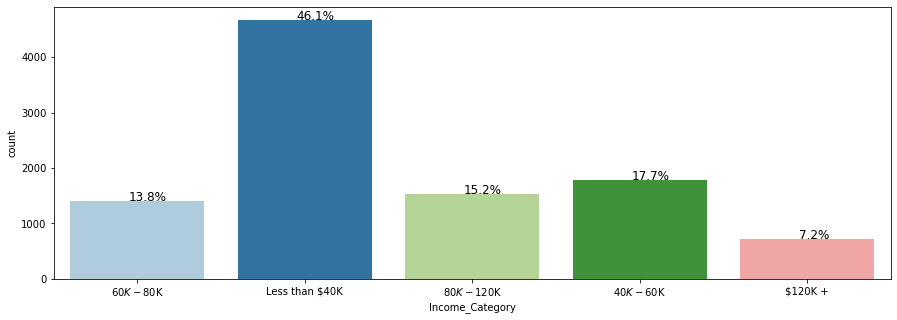

In [64]:
perc_on_bar1('Income_Category')

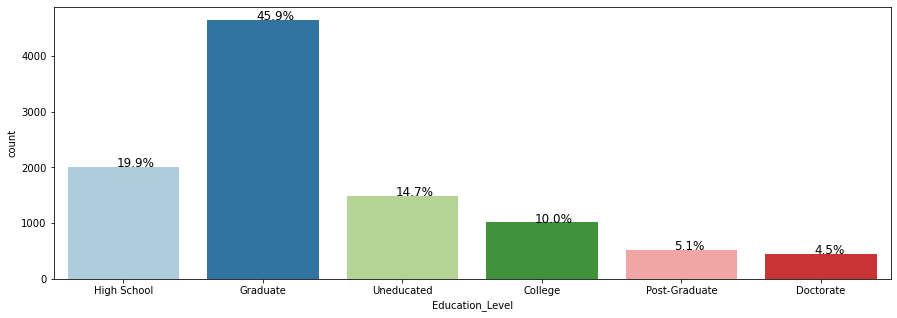

In [65]:
perc_on_bar1('Education_Level')

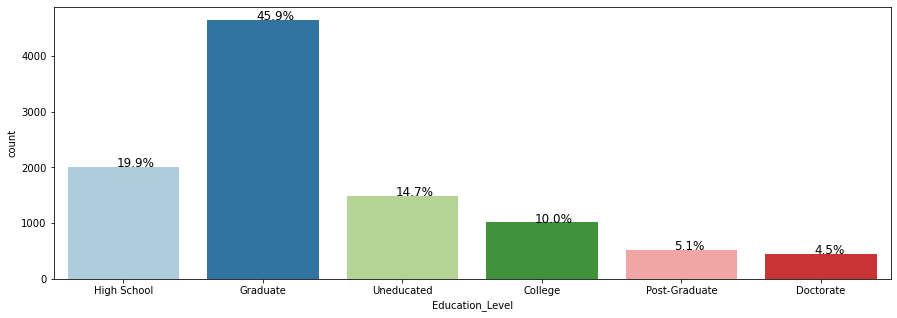

In [66]:
perc_on_bar1('Education_Level')

#### Outliers treatment 

In [67]:
# Create another duplicate dataset for data preprocessing , outliers
bank2 = bank1.copy()
bank2.head ()

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0               0            45       0                3     High School   
1               0            49       1                5        Graduate   
2               0            51       0                3        Graduate   
3               0            40       1                4     High School   
4               0            40       0                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Married  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       1                      3   
1                         6                       1                      2   
2                         4                       1                      0   
3                         3                       4                      1   
4                         5                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

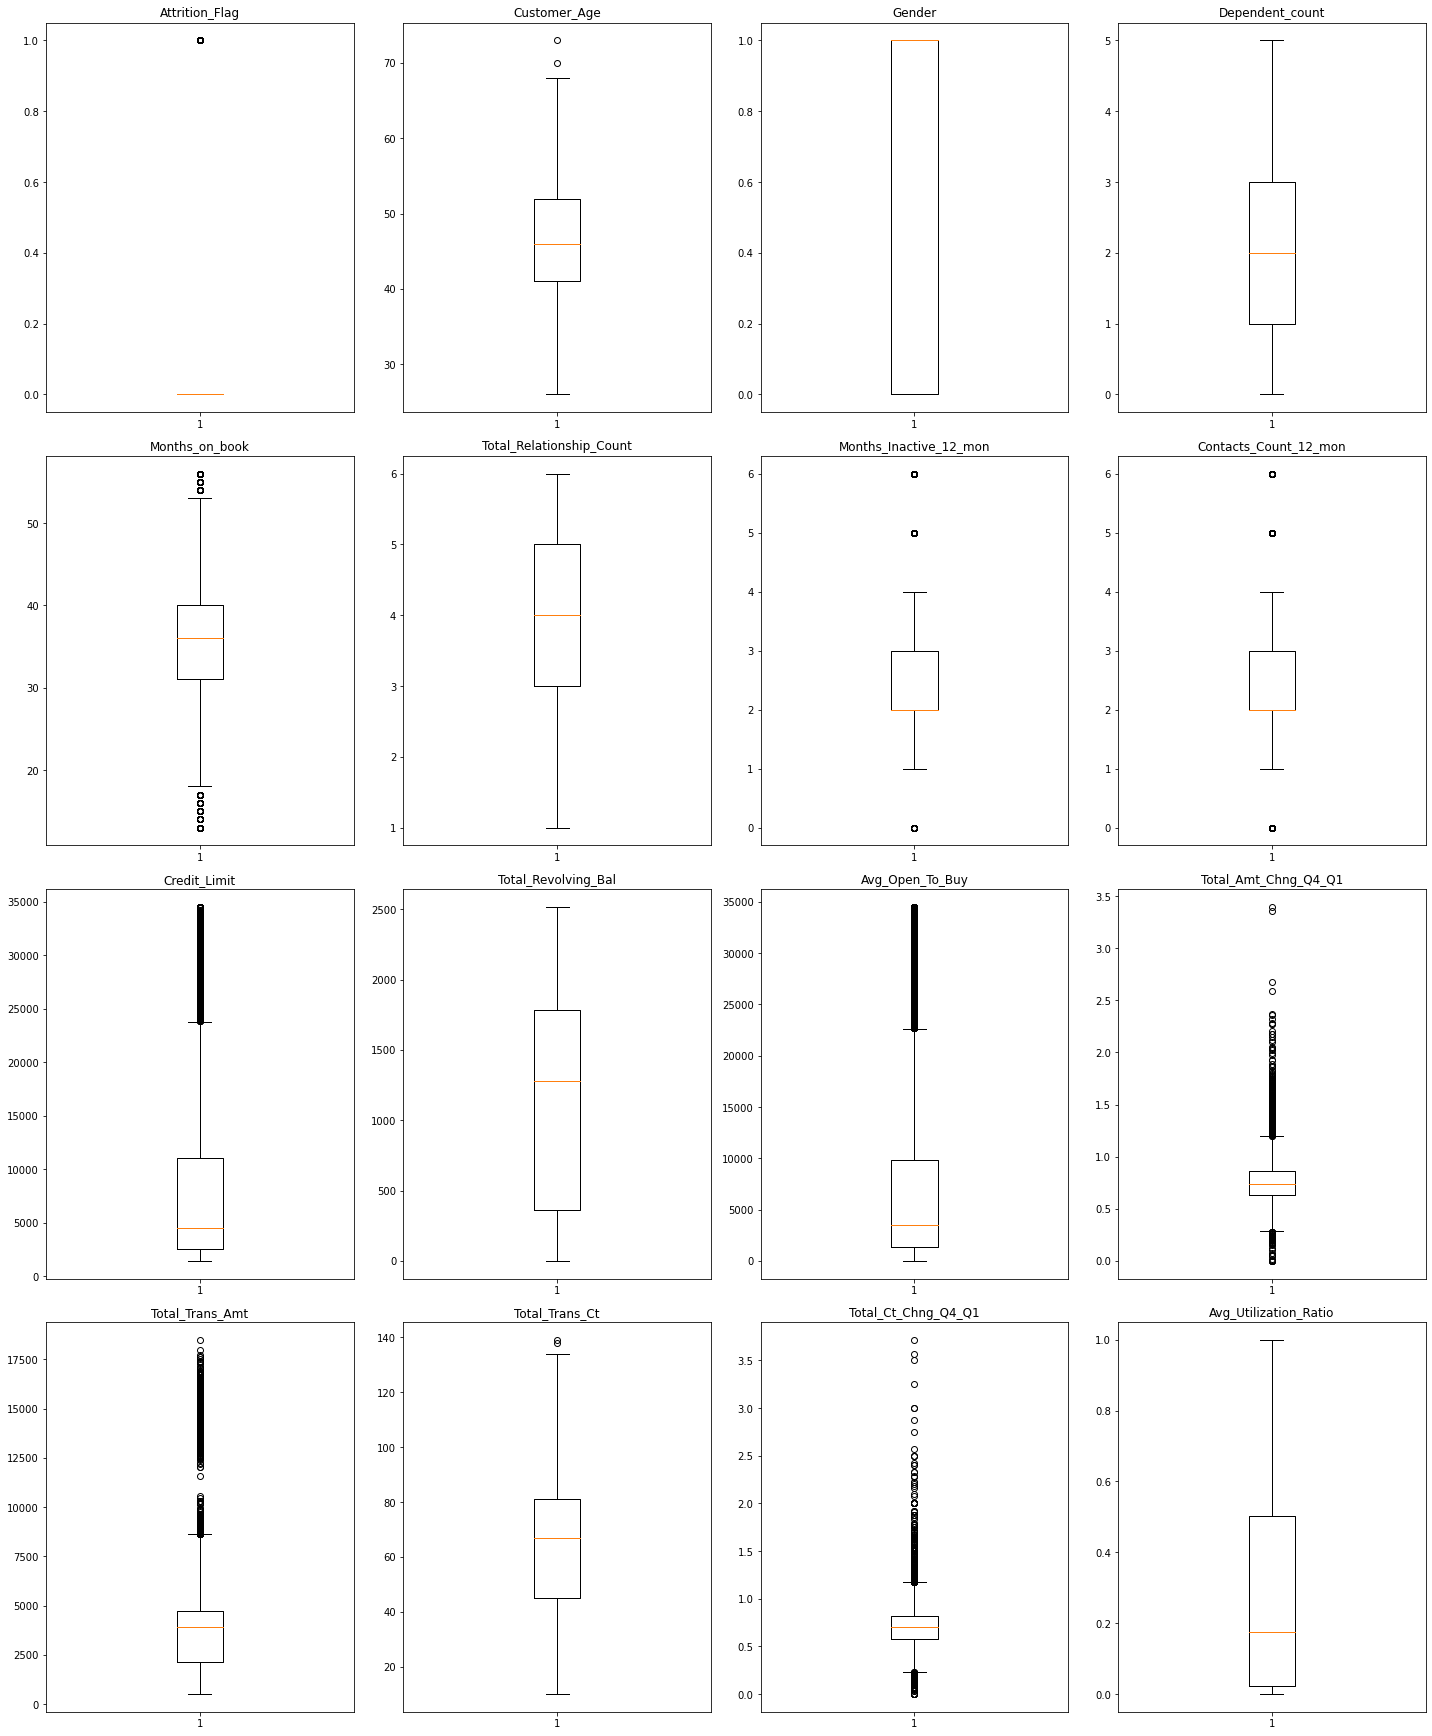

In [68]:
# let's define numeric columns

numeric_columns = bank2.select_dtypes(include=np.number).columns.tolist()

# let's plot the boxplots of all columns to check for outliers

plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(bank2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

    
plt.show()

We validated the outliers identified for treatment during univariable analysis:  
  
•	Customer_Age   
•	Months_on_book   
•	Credit_Limit   
•	Avg_Open_To_Buy  
•	Total_Amt_Chng_Q4_Q1   
•	Total_Trans_Amt   
•	Total_Trans_Ct   
•	Total_Ct_Chng_Q4_Q1   

As well we add now the two below:
   
•	Months_Inactive_12_mon	  
•	Contacts_Count_12_mon   

 

In [69]:
# Defining variables targeted for outlier treatment

outlier_columns = bank2[[
'Customer_Age'  ,
'Months_on_book' ,
'Credit_Limit', 
'Avg_Open_To_Buy' , 
'Total_Amt_Chng_Q4_Q1' ,   
'Total_Trans_Amt' , 
'Total_Trans_Ct' ,
'Total_Ct_Chng_Q4_Q1' ,
'Months_Inactive_12_mon', 
'Contacts_Count_12_mon' 
]]

In [70]:


# Let's treat outliers by flooring and capping, we used bank2 dataset now
def treat_outliers(bank2, col):
    """
    treats outliers in a variable
    col: str, name of the outlier variable
    bank2: dataframe
    col: name of the column
    """
    Q1 = bank2[col].quantile(0.25)  # 25th quantile
    Q3 = bank2[col].quantile(0.75)  # 75th quantile
    IQR = Q3 - Q1
    Lower_Whisker = Q1 - 1.5 * IQR
    Upper_Whisker = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    bank2[col] = np.clip(bank2[col], Lower_Whisker, Upper_Whisker)

    return bank2


def treat_outliers_all( bank2 , outlier_columns):
    """
    treat outlier in relevant variables
    outlier_columns: list of variables
    bank2: data frame
    """
    for c in outlier_columns:
        bank2 = treat_outliers(bank2, c)

    return bank2

In [71]:
# Let run the outlier treat function

bank2 = treat_outliers_all(bank2, outlier_columns)

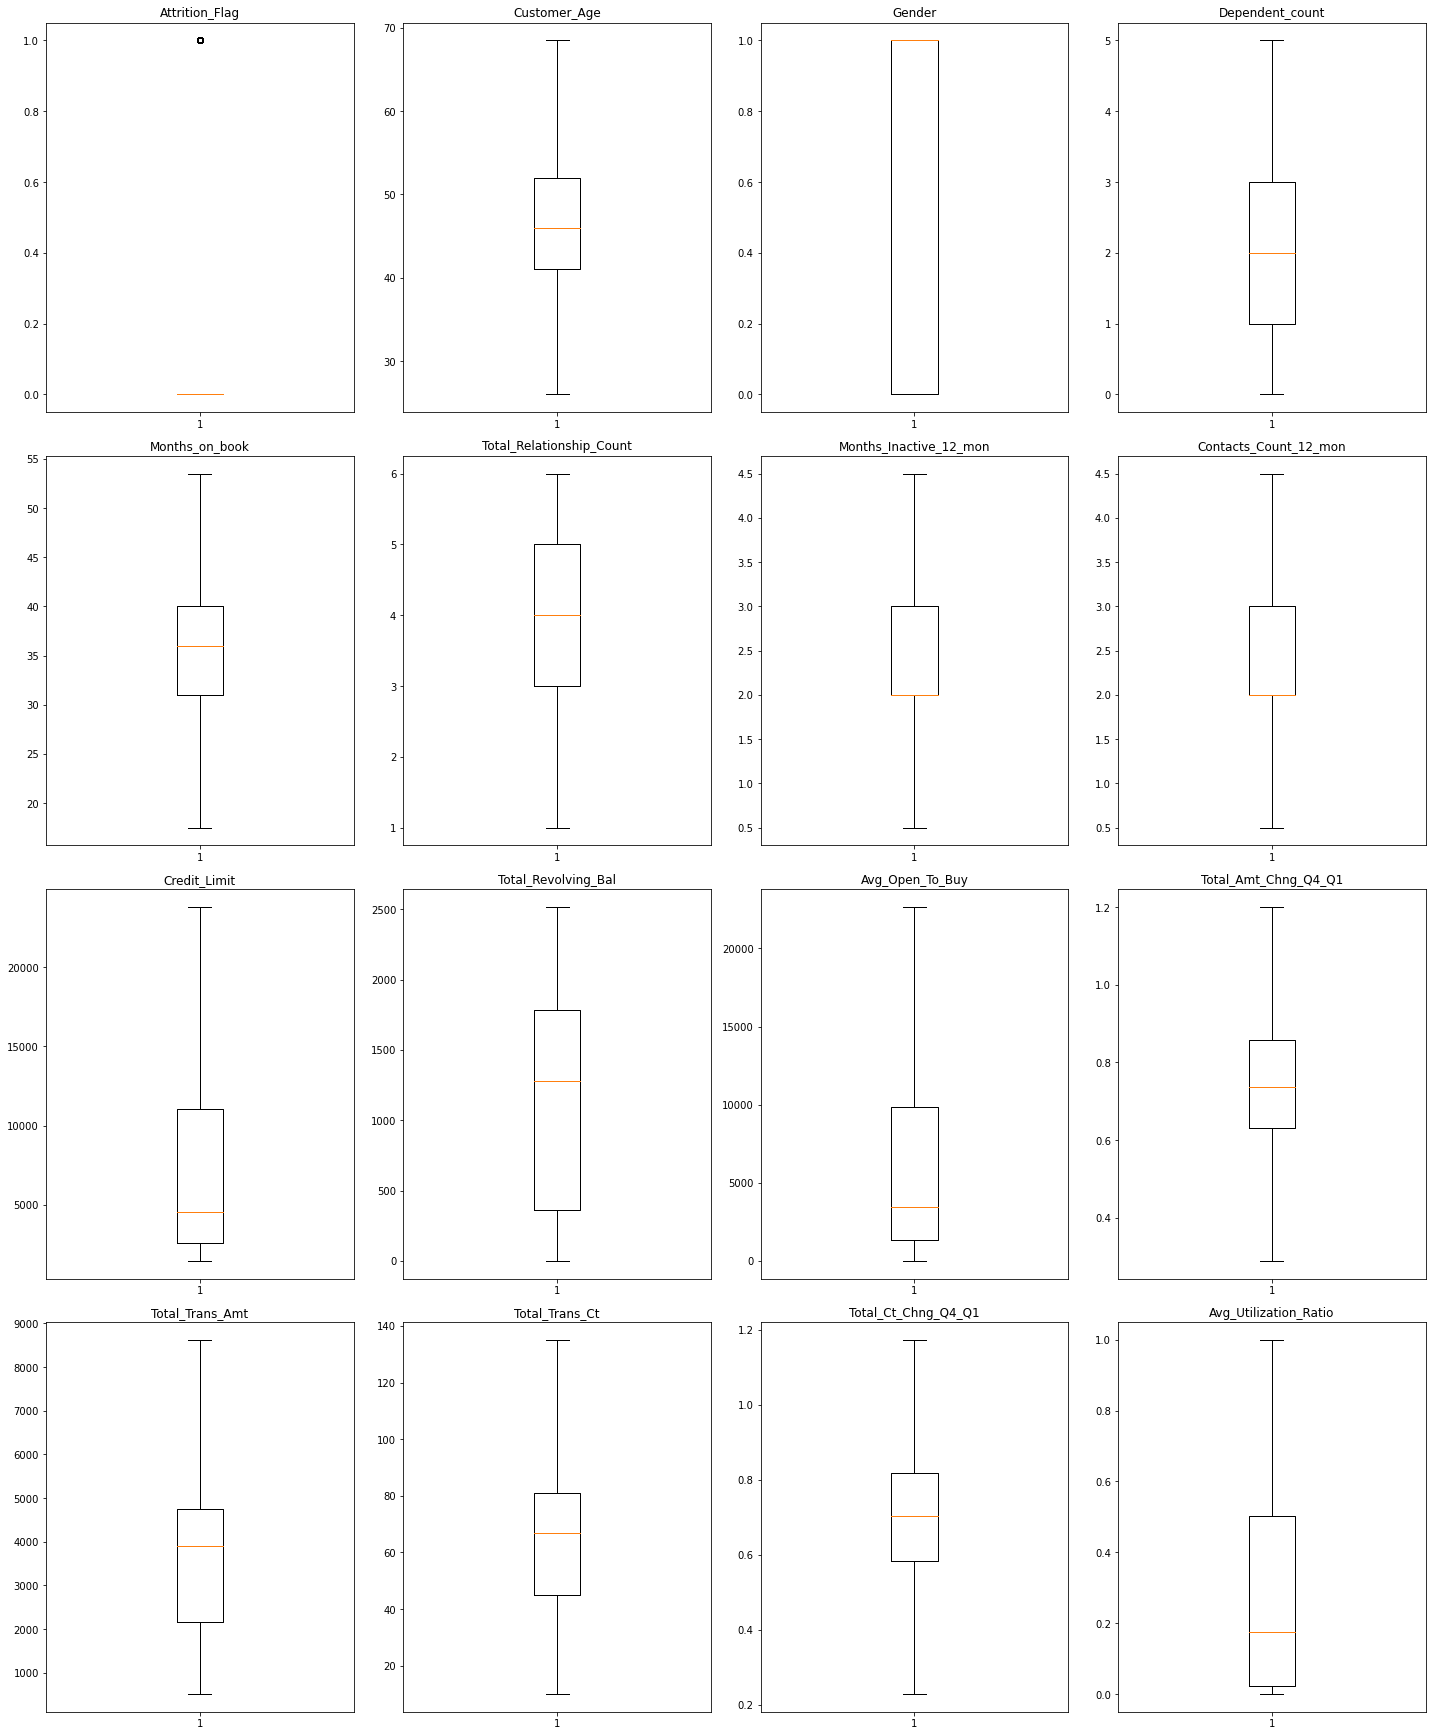

In [72]:
# let look at box plot to see if outliers have been treated or not
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(bank2[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

The boxplot results above shows the outliers were taken care of.  

#### Dummies creation 

In [73]:
# Create another duplicate dataset for data preprocessing , dummies
bank3 = bank2.copy()
bank3.head ()

Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0               0          45.0       0                3     High School   
1               0          49.0       1                5        Graduate   
2               0          51.0       0                3        Graduate   
3               0          40.0       1                4     High School   
4               0          40.0       0                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue            39.0   
1         Single  Less than $40K          Blue            44.0   
2        Married    $80K - $120K          Blue            36.0   
3        Married  Less than $40K          Blue            34.0   
4        Married     $60K - $80K          Blue            21.0   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                     1.0                    3.0   
1                         6                     1.0                    2.0   
2                         4                     1.0                    0.5   
3                         3                     4.0                    1.0   
4                         5                     1.0                    0.5   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.201   
1        8256.0                  864           7392.0                 1.201   
2        3418.0                    0           3418.0                 1.201   
3        3313.0                 2517            796.0                 1.201   
4        4716.0                    0           4716.0                 1.201   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0           1144.0              42                1.172                  0.061  
1           1291.0              33                1.172                  0.105  
2           1887.0              20                1.172                  0.000  
3           1171.0              20                1.172                  0.760  
4            816.0              28                1.172                  0.000

In [74]:
# Let create dummies for the categorical variables 
bank3 = pd.get_dummies(bank3, columns=["Education_Level", "Marital_Status", "Income_Category", "Card_Category"], drop_first=True)



In [75]:
# Let check the change was processed
np.random.seed(1)
bank3.sample(n=10)

Attrition_Flag  Customer_Age  Gender  Dependent_count  Months_on_book  \
6498               0          43.0       1                2            36.0   
9013               0          38.0       1                1            32.0   
2053               0          39.0       0                2            31.0   
3211               0          44.0       0                4            32.0   
5559               1          38.0       1                2            28.0   
6106               0          54.0       0                3            42.0   
4150               1          53.0       1                3            40.0   
2205               0          38.0       0                4            27.0   
4145               0          43.0       0                1            31.0   
5324               1          50.0       1                1            46.0   

      Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
6498                         6                     3.0                    2.0   
9013                         2                     3.0                    3.0   
2053                         6                     3.0                    2.0   
3211                         6                     3.0                    4.0   
5559                         5                     2.0                    4.0   
6106                         3                     1.0                    2.0   
4150                         6                     3.0                    2.0   
2205                         6                     2.0                    4.0   
4145                         4                     3.0                    3.0   
5324                         6                     4.0                    3.0   

      Credit_Limit  Total_Revolving_Bal  ...  Education_Level_Uneducated  \
6498       2570.00                 2107  ...                           0   
9013       2609.00                 1259  ...                           0   
2053       9871.00                 1061  ...                           0   
3211      23836.25                 2517  ...                           0   
5559       1614.00                    0  ...                           0   
6106      23836.25                 2488  ...                           0   
4150       1625.00                    0  ...                           0   
2205       5535.00                 1276  ...                           0   
4145      23836.25                 1170  ...                           0   
5324       1970.00                 1477  ...                           0   

      Marital_Status_Married  Marital_Status_Single  \
6498                       1                      0   
9013                       1                      0   
2053                       1                      0   
3211                       1                      0   
5559                       1                      0   
6106                       0                      1   
4150                       0                      1   
2205                       1                      0   
4145                       0                      1   
5324                       0                      1   

      Income_Category_$40K - $60K  Income_Category_$60K - $80K  \
6498                            0                            0   
9013                            0                            0   
2053                            0                            1   
3211                            0                            0   
5559                            0                            0   
6106                            0                            0   
4150                            1                            0   
2205                            1                            0   
4145                            0                            1   
5324                            0                            0   

      Income_Category_$80K - $120K  Income_Category_Less than $40K  \
6498

Dummies were created successfully.

In [76]:
# Last let check the data types before building the models. 
bank3.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Attrition_Flag                  10127 non-null  int64  
 1   Customer_Age                    10127 non-null  float64
 2   Gender                          10127 non-null  int64  
 3   Dependent_count                 10127 non-null  int64  
 4   Months_on_book                  10127 non-null  float64
 5   Total_Relationship_Count        10127 non-null  int64  
 6   Months_Inactive_12_mon          10127 non-null  float64
 7   Contacts_Count_12_mon           10127 non-null  float64
 8   Credit_Limit                    10127 non-null  float64
 9   Total_Revolving_Bal             10127 non-null  int64  
 10  Avg_Open_To_Buy                 10127 non-null  float64
 11  Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 12  Total_Trans_Amt                 

In [77]:
# Compare the baseline dataset vs. the transformed ones

print ('Bank dataset -> ' , bank.shape)
 
print ('Bank1 dataset -> ', bank1.shape)

print ('Bank2 dataset -> ', bank2.shape)

print ('Bank3 dataset -> ', bank3.shape)

Bank dataset ->  (10127, 21)
Bank1 dataset ->  (10127, 20)
Bank2 dataset ->  (10127, 20)
Bank3 dataset ->  (10127, 30)


Bank was the original dataset baseline.     
Bank1 handled the deletion of customer number, imputations, and replacements.    
Bank2 dataset, we took care of the outliers.   
Bank3, we created dummies variables and this dataset is ready for model building.  


### <a name='link5'> Model building - preparations  </a>

The bank wants to identify upfront the customers that will drop the credit card, so identifying the attrition before it materialized is critical. If the bank identified such customers, it could correct and influence the decision.     
The models will predict attrition: YES (1)/ NO (0).     
True Positives (TP) is the focus, so Recall is the most important metric for choosing a model and for insight analysis.    
But as well second in importance is identifying True Negatives (TN) on top of the True Positives (TP), so we will check Accuracy. And in the same lines, we will check Precision, True Positives (TP) concerning the overall population identified as Positives (TP + FP).  


In [78]:
# Define the predicted variable
x = bank3.drop(["Attrition_Flag"], axis=1)
y = bank3["Attrition_Flag"]

In [79]:
# Splitting data into training, validation and test set, we avoid data leakage :
# first we split data into 2 parts, say temporary and test

X_temp, X_test, y_temp, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 29) (2026, 29) (2026, 29)


Number of rows in train data = 6075   
Number of rows in validation data = 2026  
Number of rows in test data = 2026  

In [80]:
print("Train, counts of label 'Attrited Customer': {}".format(sum(y_train  == 1)))
print("Train , counts of label 'Existing Customer': {} \n".format(sum(y_train  == 0)))

print("Validation, counts of label 'Attrited Customer': {}".format(sum(y_val == 1)))
print("Validation, counts of label 'Existing Customer': {} \n".format(sum(y_val == 0)))

print("Test, counts of label 'Attrited Customer': {}".format(sum(y_test == 1)))
print("Test, counts of label 'Existing Customer': {} \n".format(sum(y_test == 0)))

print ("The stratify method worked and the attrition percentages are consistent across the train, validation, and test datasets. ")

Train, counts of label 'Attrited Customer': 976
Train , counts of label 'Existing Customer': 5099 

Validation, counts of label 'Attrited Customer': 326
Validation, counts of label 'Existing Customer': 1700 

Test, counts of label 'Attrited Customer': 325
Test, counts of label 'Existing Customer': 1701 

The stratify method worked and the attrition percentages are consistent across the train, validation, and test datasets. 


### <a name='link6'> Model building </a>

In [81]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    models: classifiers
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [82]:
# Defining a function to create the confusion matrix 
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    models: classifiers
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Decision Tree

In [83]:
# Create the decision tree using gini, this is our baseline
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [84]:
# Calculating different metrics using the train set
d_tree__model_train_perf = model_performance_classification_sklearn(
    dTree, X_train, y_train
)
print("Training performance:")
d_tree__model_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [85]:
# Calculating different metrics using the validation set
d_tree__model_val_perf = model_performance_classification_sklearn(
    dTree, X_val, y_val
)
print("Validation performance:")
d_tree__model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.937315  0.809816   0.802432  0.806107

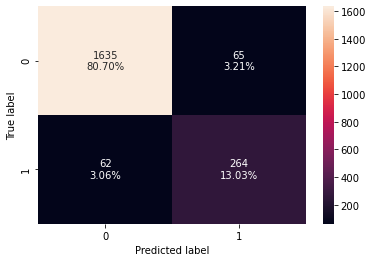

In [86]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(dTree, X_val, y_val)

It looks the model is overfitting, with perfect results with the training dataset but having a significant degradation with the validation dataset.  

In [87]:
# Let check the variables names
feature_names = list(x.columns)
print(feature_names)

['Customer_Age', 'Gender', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'Education_Level_Doctorate', 'Education_Level_Graduate', 'Education_Level_High School', 'Education_Level_Post-Graduate', 'Education_Level_Uneducated', 'Marital_Status_Married', 'Marital_Status_Single', 'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K', 'Income_Category_Less than $40K', 'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver']


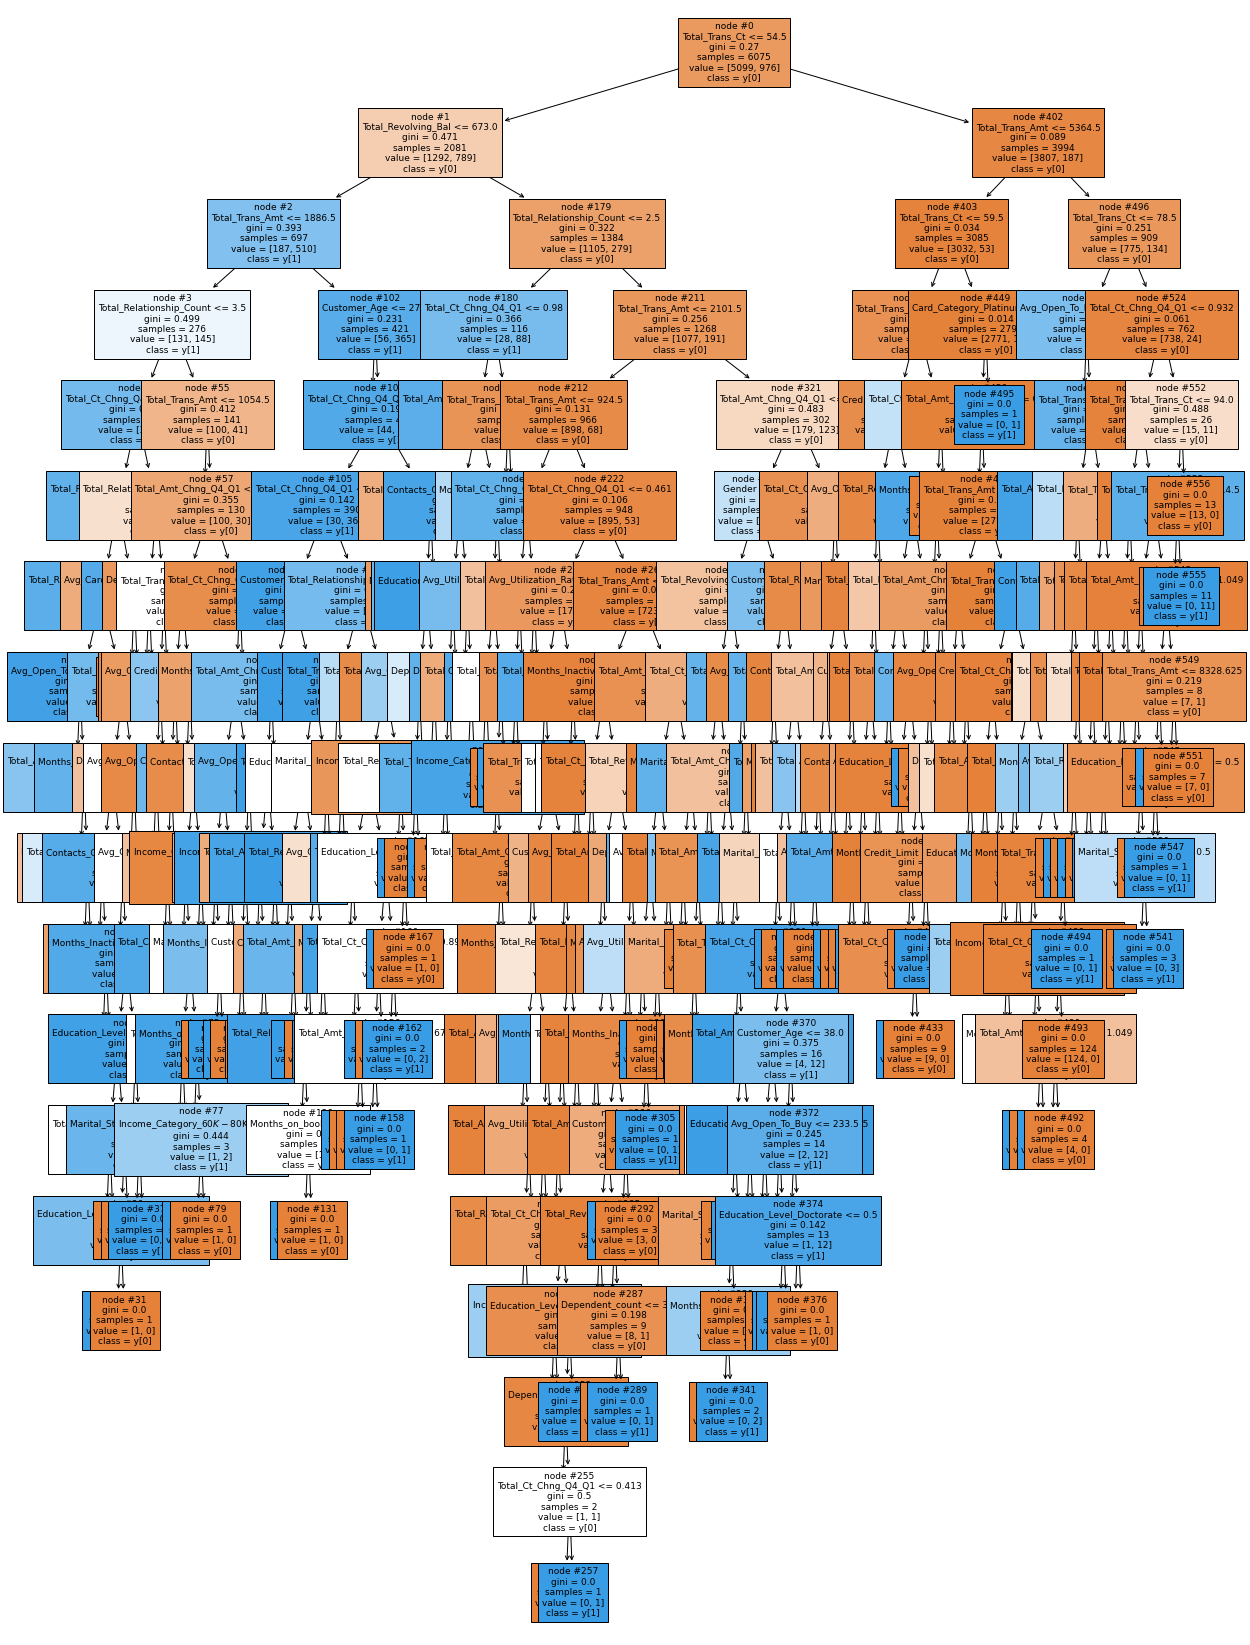

In [88]:
# Let build the decision tree visually 
plt.figure(figsize=(20,30))
tree.plot_tree(dTree,feature_names=feature_names,filled=True,fontsize=9,node_ids=True,class_names=True)
plt.show()

In [89]:
# Text report showing the rules of a decision tree

print(tree.export_text(dTree,feature_names=feature_names,show_weights=True))

|--- Total_Trans_Ct <= 54.50
|   |--- Total_Revolving_Bal <= 673.00
|   |   |--- Total_Trans_Amt <= 1886.50
|   |   |   |--- Total_Relationship_Count <= 3.50
|   |   |   |   |--- Total_Ct_Chng_Q4_Q1 <= 0.81
|   |   |   |   |   |--- Total_Revolving_Bal <= 564.00
|   |   |   |   |   |   |--- Total_Relationship_Count <= 2.50
|   |   |   |   |   |   |   |--- Avg_Open_To_Buy <= 14435.00
|   |   |   |   |   |   |   |   |--- weights: [0.00, 41.00] class: 1
|   |   |   |   |   |   |   |--- Avg_Open_To_Buy >  14435.00
|   |   |   |   |   |   |   |   |--- Total_Amt_Chng_Q4_Q1 <= 0.78
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 4.00] class: 1
|   |   |   |   |   |   |   |   |--- Total_Amt_Chng_Q4_Q1 >  0.78
|   |   |   |   |   |   |   |   |   |--- Marital_Status_Single <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |   |--- Marital_Status_Single >  0.50
|   |   |   |   |   |   |   |   |   |   |--- weights: [2.00, 0.

We are not going to compute and analyze features' importance in these phases of the model building. We will perform it at the end after choosing the finalist models. 



#### Logistic regression

In [90]:
# # Create the logistic regression model 
lr = LogisticRegression(random_state=1)
lr.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [91]:
# Calculating different metrics using the train set
lr__model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
lr__model_train_perf

Training performance:


Accuracy    Recall  Precision       F1
0   0.88214  0.464139   0.701238  0.55857

In [92]:
# Calculating different metrics using the validation set
lr__model_val_perf = model_performance_classification_sklearn(
    lr, X_val, y_val
)
print("Validation performance:")
lr__model_val_perf

Validation performance:


Accuracy   Recall  Precision        F1
0  0.891412  0.53681   0.717213  0.614035

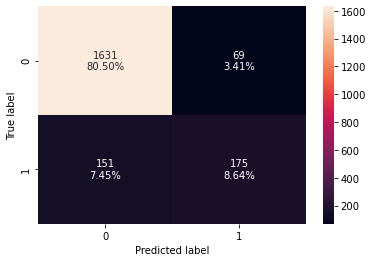

In [93]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(lr, X_val, y_val)

The Logistic Regression model performance results are far from being satisfactory across the dataset. The Recall is less than 50% but as well the other metrics are low. 

#### Random Forest Classifier

In [94]:
#Let build random forest classifier model
rf =RandomForestClassifier(random_state=1)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

In [95]:
# Calculating different metrics using the train set
rf__model_train_perf = model_performance_classification_sklearn(
    lr, X_train, y_train
)
print("Training performance:")
rf__model_train_perf

Training performance:


Accuracy    Recall  Precision       F1
0   0.88214  0.464139   0.701238  0.55857

In [96]:
# Calculating different metrics using the validation set
rf__model_val_perf = model_performance_classification_sklearn(
    lr, X_val, y_val
)
print("Validation performance:")
rf__model_val_perf

Validation performance:


Accuracy   Recall  Precision        F1
0  0.891412  0.53681   0.717213  0.614035

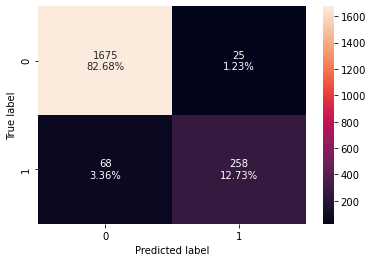

In [97]:
# creating confusion matrix using the validation 
confusion_matrix_sklearn(rf, X_val, y_val)

The Random Forest model performance results are low across the dataset. The Recall and the other metrics are low. 

#### Bagging classifier

In [98]:
# Building a bagging classifier model, it's a decision tree

bagging_estimator=BaggingClassifier(random_state=1)
bagging_estimator.fit(X_train ,y_train )

BaggingClassifier(random_state=1)

In [99]:
# Calculating different metrics using the train set
bc__model_train_perf = model_performance_classification_sklearn(
    bagging_estimator, X_train, y_train
)
print("Training performance:")
bc__model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.996872  0.984631   0.995855  0.990211

In [100]:
# Calculating different metrics using the validation set
bc__model_val_perf = model_performance_classification_sklearn(
    bagging_estimator, X_val, y_val
)
print("Validation performance:")
bc__model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.952616  0.806748   0.888514  0.845659

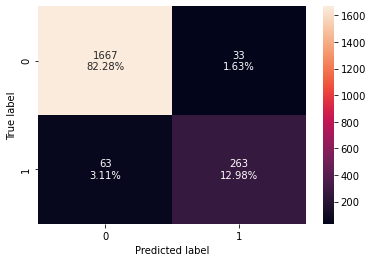

In [101]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(bagging_estimator, X_val, y_val)

The Bagging Classifier Model is doing extremely well with the training dataset but the validation dataset results show a clear overfit especially with the Recall performance. 

####  AdaBoost Classifier 

In [102]:
# Let build a model using Adaboost Classifier
adab = AdaBoostClassifier(random_state=1)
adab.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

In [103]:
# Calculating different metrics using the train set
adab__model_train_perf = model_performance_classification_sklearn(
    adab, X_train, y_train
)
print("Training performance:")
adab__model_train_perf

Training performance:


Accuracy   Recall  Precision       F1
0  0.957366  0.83709   0.890949  0.86318

In [104]:
# Calculating different metrics using the validation set
adab__model_val_perf = model_performance_classification_sklearn(
    adab, X_val, y_val
)
print("Validation performance:")
adab__model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.959526  0.858896   0.886076  0.872274

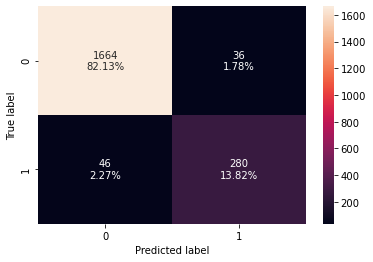

In [105]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(adab, X_val, y_val)

Adaboost performance is very consistent and good across the performance metrics, both for the training and validation datasets. But still, it’s not meeting the threshold expectations. 

####  XGBoost Classifier  

In [106]:
# Let build a model using XG Boost Classifier
xgboost = XGBClassifier(random_state=1,eval_metric='logloss')
xgboost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [107]:
# Calculating different metrics using the train set
xgboost__model_train_perf = model_performance_classification_sklearn(
    xgboost, X_train, y_train
)
print("Training performance:")
xgboost__model_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [108]:
# Calculating different metrics using the validation set
xgboost__model_val_perf = model_performance_classification_sklearn(
    xgboost, X_val, y_val
)
print("Validation performance:")
xgboost__model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.970879  0.892638    0.92381  0.907956

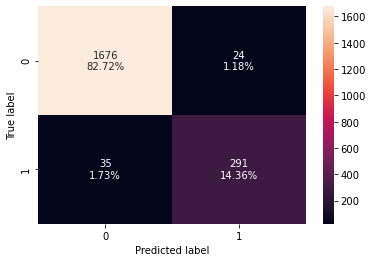

In [109]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(xgboost, X_val, y_val)

XGBoost results having excellent performance results with the training dataset but a drop with the validation dataset indicates an overfitting situation. 

### <a name='link7'> Model building - Oversampled data </a>


The predicted variable, attrition flag is unbalanced so this is creating part of the overfitting issues.     
We are going to oversample using the Synthetic Minority Oversampling Technique (SMOTE).    
SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. This algorithm helps to overcome the overfitting problem posed by random oversampling. It focuses on the feature space to generate new instances with the help of interpolation between the positive instances that lie together.


In [110]:
print("Before UpSampling, counts of label 'Attrited Customer': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'Existing Customer': {} \n".format(sum(y_train == 0)))

sm = SMOTE(
    sampling_strategy=1, k_neighbors=5, random_state=1
)  # Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Attrited Customer': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'Existing Customer': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

print(" Oversampled dataset is ready for usage model building. " )

Before UpSampling, counts of label 'Attrited Customer': 976
Before UpSampling, counts of label 'Existing Customer': 5099 

After UpSampling, counts of label 'Attrited Customer': 5099
After UpSampling, counts of label 'Existing Customer': 5099 

After UpSampling, the shape of train_X: (10198, 29)
After UpSampling, the shape of train_y: (10198,) 

 Oversampled dataset is ready for usage model building. 


#### Decision Tree - Oversampled 

In [111]:
# Create the decision tree using gini 
dTree_over = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree_over.fit(X_train_over, y_train_over)

DecisionTreeClassifier(random_state=1)

In [113]:
# Calculating different metrics using the train set
d_tree_over_model_train_perf = model_performance_classification_sklearn(
    dTree_over, X_train_over, y_train_over
)
print("Training performance:")
d_tree_over_model_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [114]:
# Calculating different metrics using the validation set
d_tree_over_model_val_perf = model_performance_classification_sklearn(
    dTree_over, X_val, y_val
)
print("Validation performance:")
d_tree_over_model_val_perf

Validation performance:


Accuracy    Recall  Precision       F1
0  0.924975  0.822086   0.740331  0.77907

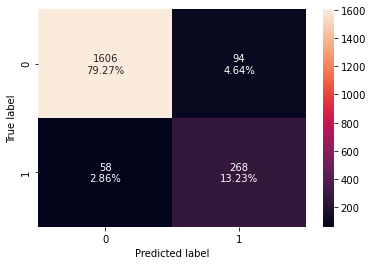

In [115]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(dTree_over, X_val, y_val)

Still, the Decision Tree Oversampled model is giving overfitting results when looking into the training and validation datasets' performance. 

#### Logistic regression - Oversampled 

In [116]:
# Build a logistic regression model using the oversampled dataset 
lr_over = LogisticRegression(random_state=1)
lr_over.fit(X_train_over, y_train_over)

LogisticRegression(random_state=1)

In [117]:
# Calculating different metrics using the train set
lr_over_model_train_perf = model_performance_classification_sklearn(
    lr_over, X_train_over, y_train_over
)
print("Training performance:")
lr_over_model_train_perf

Training performance:


Accuracy    Recall  Precision      F1
0  0.823495  0.830947   0.818744  0.8248

In [118]:
# Calculating different metrics using the validation set
lr_over_model_val_perf = model_performance_classification_sklearn(
    lr_over, X_val, y_val
)
print("Validation performance:")
lr_over_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.818361  0.806748   0.463028  0.588367

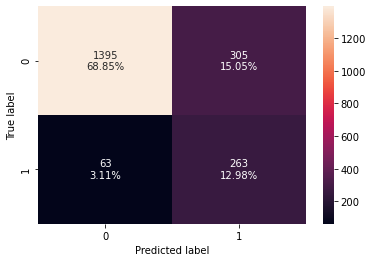

In [119]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(lr_over, X_val, y_val)

The Logistic Regression Oversampled performance improved and it’s pretty consistent across datasets but it’s not excellent. 

#### Random Forest Classifier - Oversampled 

In [120]:
#Let train the random forest classifier
rf_over =RandomForestClassifier(random_state=1)
rf_over.fit(X_train_over,y_train_over)

RandomForestClassifier(random_state=1)

In [121]:
# Calculating different metrics on train set
rf_over_model_train_perf = model_performance_classification_sklearn(
    lr_over, X_train_over, y_train_over
)
print("Training performance:")
rf_over_model_train_perf

Training performance:


Accuracy    Recall  Precision      F1
0  0.823495  0.830947   0.818744  0.8248

In [122]:
# Calculating different metrics on validation set
rf_over_model_val_perf = model_performance_classification_sklearn(
    lr_over, X_val, y_val
)
print("Validation performance:")
rf_over_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.818361  0.806748   0.463028  0.588367

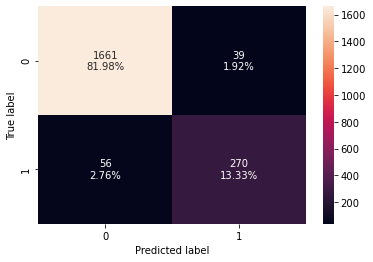

In [123]:
# creating confusion matrix
confusion_matrix_sklearn(rf_over, X_val, y_val)

Random Forest Oversampled model performance is consistent across the datasets but it’s not performing very well. Like the model above it’s far from matching the threshold expectations, Recall being around 80% is not good enough. 

#### Bagging classifier - Oversampled 

In [124]:
# Building a bagging classifier with the oversampled dataset, it's a decision tree

bagging_estimator_over=BaggingClassifier(random_state=1)
bagging_estimator_over.fit(X_train_over ,y_train_over )

BaggingClassifier(random_state=1)

In [125]:
# Calculating different metrics using the train set
bc_over_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_over, X_train_over, y_train_over
)
print("Training performance:")
bc_over_model_train_perf

Training performance:


Accuracy   Recall  Precision        F1
0  0.998137  0.99745   0.998822  0.998136

In [126]:
# Calculating different metrics using the validation set
bc_over_model_val_perf = model_performance_classification_sklearn(
    bagging_estimator_over, X_val, y_val
)
print("Validation performance:")
bc_over_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.941757  0.852761   0.798851  0.824926

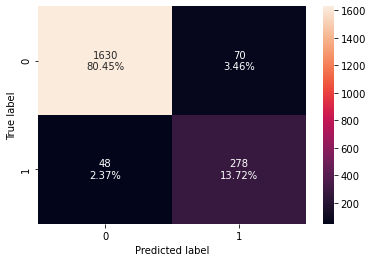

In [127]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(bagging_estimator_over, X_val, y_val)

The Bagging Classifier Oversampled model is matching the threshold expectation with the training dataset, not with the validation dataset showing overfitting behavior. 

####  AdaBoost Classifier - Oversampled 

In [128]:
# Let build a model using Adaboost Classifier with the oversampled dataset
adab_over = AdaBoostClassifier(random_state=1)
adab_over.fit(X_train_over,y_train_over)

AdaBoostClassifier(random_state=1)

In [129]:
# Calculating different metrics using the train set
adab_over_model_train_perf = model_performance_classification_sklearn(
    adab_over, X_train_over, y_train_over
)
print("Training performance:")
adab_over_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.964307  0.965287   0.963398  0.964342

In [130]:
# Calculating different metrics using the validation set
adab_over_model_val_perf = model_performance_classification_sklearn(
    adab_over, X_val, y_val
)
print("Validation performance:")
adab_over_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.949654  0.880368       0.82  0.849112

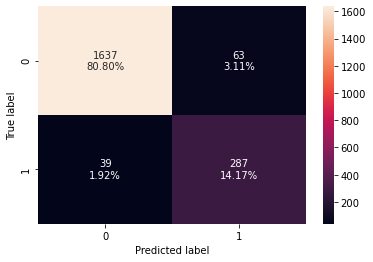

In [131]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(adab_over, X_val, y_val)

AdaBoost Oversampled model is doing pretty well but the validation dataset results Recall performance is showing not good results and maybe overfitting. 

####  XGBoost Classifier - Oversampled 

In [132]:
# Let build a model using XG Boost Classifier with the oversample dataset
xgboost_over = XGBClassifier(random_state=1,eval_metric='logloss')
xgboost_over.fit(X_train_over,y_train_over)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [133]:
# Calculating different metrics using the train set
xgboost_over_model_train_perf = model_performance_classification_sklearn(
    xgboost_over, X_train_over, y_train_over
)
print("Training performance:")
xgboost_over_model_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [134]:
# Calculating different metrics using the validation set
xgboost_over_model_val_perf = model_performance_classification_sklearn(
    xgboost_over, X_val, y_val
)
print("Validation performance:")
xgboost_over_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.967423  0.898773   0.898773  0.898773

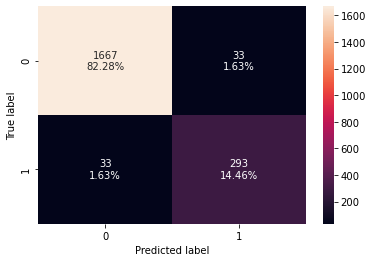

In [135]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(xgboost_over, X_val, y_val)

XGBoost Oversampled model results are still having excellent performance results with the training dataset but a drop with the validation dataset indicates an overfitting situation. 

### <a name='link8'> Model building - Undersampled data </a>


The predicted variable, attrition flag is unbalanced so this is creating part of the overfitting issues.     
We are going to apply the undersample method. Random undersampling deletes examples from the majority class and can result in losing information invaluable to a model.


In [136]:
rus = RandomUnderSampler(random_state=1) # Applying under-sample method
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [137]:
print("Before Under Sampling, counts of label 'Attrited Customer': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'Existing Customer': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Attrited Customer': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'Existing Customer': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Attrited Customer': 976
Before Under Sampling, counts of label 'Existing Customer': 5099 

After Under Sampling, counts of label 'Attrited Customer': 976
After Under Sampling, counts of label 'Existing Customer': 976 

After Under Sampling, the shape of train_X: (1952, 29)
After Under Sampling, the shape of train_y: (1952,) 



#### Decision Tree - Undersampled

In [138]:
# Create the decision tree using gini, this is our baseline
dTree_un = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree_un.fit(X_train_un, y_train_un)

DecisionTreeClassifier(random_state=1)

In [139]:
# Calculating different metrics using the train set
d_tree_un_model_train_perf = model_performance_classification_sklearn(
    dTree_un, X_train_un, y_train_un
)
print("Training performance:")
d_tree_un_model_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [140]:
# Calculating different metrics using the validation set
d_tree_un_model_val_perf = model_performance_classification_sklearn(
    dTree_un, X_val, y_val
)
print("Validation performance:")
d_tree_un_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0   0.88845  0.904908   0.602041  0.723039

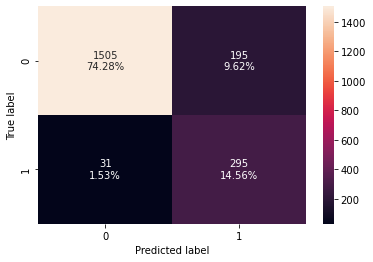

In [141]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(dTree_un, X_val, y_val)

The Decision Tree Undersampled model is having is showing perfect results with the training dataset but having a drop with the validation dataset. It’s overfitting. 

#### Logistic regression - Undersampled

In [142]:
# Building the logistic regression 
lr_un = LogisticRegression(random_state=1)
lr_un.fit(X_train_un, y_train_un)

LogisticRegression(random_state=1)

In [143]:
# Calculating different metrics using the train set
lr_un_model_train_perf = model_performance_classification_sklearn(
    lr_un, X_train_un, y_train_un
)
print("Training performance:")
lr_un_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.809939  0.805328   0.812823  0.809058

In [144]:
# Calculating different metrics using the validation set
lr_un_model_val_perf = model_performance_classification_sklearn(
    lr_un, X_val, y_val
)
print("Validation performance:")
lr_un_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.804541  0.812883   0.441667  0.572354

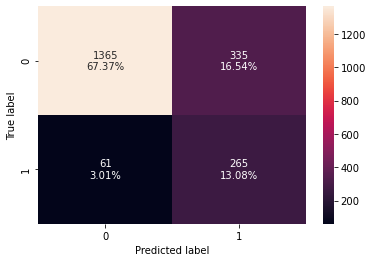

In [145]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(lr_un, X_val, y_val)

The Logistic Regression Undersampled model is consistent with Accuracy and Recall across the datasets (Train and Validation) but the performance is not so well to meet the threshold expectations. As well Precision is having a drastic drop with the validation dataset. 

#### Random Forest Classifier - Undersampled

In [146]:
#Let train the random forest classifier
rf_un =RandomForestClassifier(random_state=1)
rf_un.fit(X_train_un,y_train_un)

RandomForestClassifier(random_state=1)

In [147]:
# Calculating different metrics using the train set
rf_un_model_train_perf = model_performance_classification_sklearn(
    lr_un, X_train_un, y_train_un
)
print("Training performance:")
rf_un_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.809939  0.805328   0.812823  0.809058

In [148]:
# Calculating different metrics using the validation set
rf_un_model_val_perf = model_performance_classification_sklearn(
    lr_un, X_val, y_val
)
print("Validation performance:")
rf_un_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.804541  0.812883   0.441667  0.572354

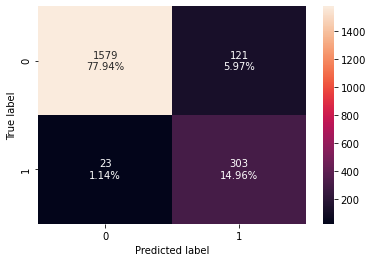

In [149]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(rf_un, X_val, y_val)

The Random Forest Undersampled model is consistent with Accuracy and Recall across the datasets (Train and Validation) but the performance is not so well to meet the threshold expectations. As well Precision is having a drastic drop with the validation dataset. 

#### Bagging classifier - Undersampled

In [150]:
# Building a bagging classifier, it's a decision tree

bagging_estimator_un=BaggingClassifier(random_state=1)
bagging_estimator_un.fit(X_train_un ,y_train_un )

BaggingClassifier(random_state=1)

In [151]:
# Calculating different metrics using the train set
bc_un_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_un, X_train_un, y_train_un
)
print("Training performance:")
bc_un_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.995902  0.992828   0.998969  0.995889

In [152]:
# Calculating different metrics using the validation set
bc_un_model_val_perf = model_performance_classification_sklearn(
    bagging_estimator_un, X_val, y_val
)
print("Validation performance:")
bc_un_model_val_perf

Validation performance:


Accuracy   Recall  Precision        F1
0   0.92152  0.92638   0.691076  0.791612

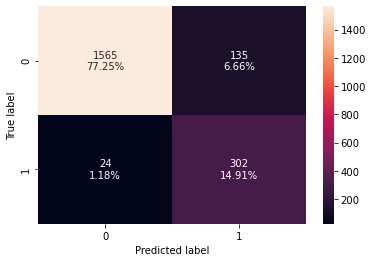

In [153]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(bagging_estimator_un, X_val, y_val)

The Bagging Classifier Undersampled model is performing very well and close to the threshold expectations. Some tuning is needed. 

####  AdaBoost Classifier - Undersampled

In [154]:
# Let build a model using Adaboost Classifier
adab_un = AdaBoostClassifier(random_state=1)
adab_un.fit(X_train_un,y_train_un)

AdaBoostClassifier(random_state=1)

In [155]:
# Calculating different metrics using the train set
adab_un_model_train_perf = model_performance_classification_sklearn(
    adab_un, X_train_un, y_train_un
)
print("Training performance:")
adab_un_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0  0.942623  0.947746   0.938134  0.942915

In [156]:
# Calculating different metrics using the validation set
adab_un_model_val_perf = model_performance_classification_sklearn(
    adab_un, X_val, y_val
)
print("Validation performance:")
adab_un_model_val_perf

Validation performance:


Accuracy   Recall  Precision        F1
0  0.928924  0.95092   0.707763  0.811518

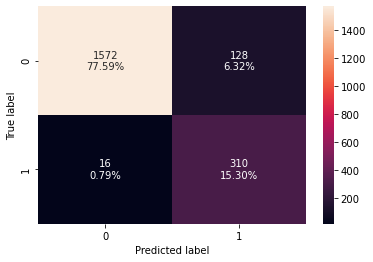

In [157]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(adab_un, X_val, y_val)

The Adaboost Classifier Undersampled model is performing very well and close to the threshold expectations. Some tuning is needed. 

####  XGBoost Classifier - Undersampled

In [158]:
# Let build a model using XG Boost Classifier
xgboost_un = XGBClassifier(random_state=1,eval_metric='logloss')
xgboost_un.fit(X_train_un,y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [159]:
# Calculating different metrics using the train set
xgboost_un_model_train_perf = model_performance_classification_sklearn(
    xgboost_un, X_train_un, y_train_un
)
print("Training performance:")
xgboost_un_model_train_perf

Training performance:


Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

In [160]:
# Calculating different metrics using the validation set
xgboost_un_model_val_perf = model_performance_classification_sklearn(
    xgboost_un, X_val, y_val
)
print("Validation performance:")
xgboost_un_model_val_perf

Validation performance:


Accuracy   Recall  Precision        F1
0  0.941264  0.96319   0.745843  0.840696

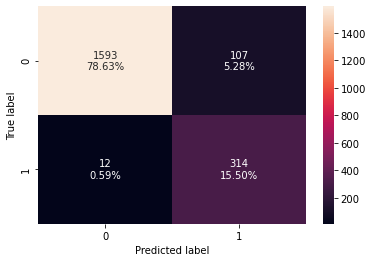

In [161]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(xgboost_un, X_val, y_val)

The XGBoost Undersampled model is still showing overfitting behavior, but the validation dataset results are excellent.  

### <a name='link9'> 3 Models tuning criteria </a>

We are going to compare the different models' performance to choose the top 3 candidates for further tuning.  

In [162]:
# create the models dictionary 

dictt = {
    
" Decision Tree train performance":d_tree__model_train_perf.values.tolist()[0],
" Decision Tree validation performance":d_tree__model_val_perf.values.tolist()[0],
" Logistic Regression train performance":lr__model_train_perf.values.tolist()[0],
" Logistic Regression validation performance":lr__model_val_perf.values.tolist()[0],
" Random Forest Classifier train performance":rf__model_train_perf.values.tolist()[0],
" Random Forest Classifier validation performance":rf__model_val_perf.values.tolist()[0],
" Bagging classifier train performance":bc__model_train_perf.values.tolist()[0], 
" Bagging classifier validation performance":bc__model_val_perf.values.tolist()[0], 
" AdaBoost train performance":adab__model_train_perf.values.tolist()[0],
" AdaBoost validation performance":adab__model_val_perf.values.tolist()[0],
" XGboost train performance":xgboost__model_train_perf.values.tolist()[0],
" XGboost validation performance":xgboost__model_val_perf.values.tolist()[0]
    
    
}

In [163]:
comparision_df = pd.DataFrame.from_dict(dictt) # Create a data frame from the dictionary

In [164]:
comparision_df.index = bc__model_train_perf.columns.tolist() # Set up the table

In [165]:
comparision_df # Visualize the table 

Decision Tree train performance  \
Accuracy                                1.0   
Recall                                  1.0   
Precision                               1.0   
F1                                      1.0   

            Decision Tree validation performance  \
Accuracy                                0.937315   
Recall                                  0.809816   
Precision                               0.802432   
F1                                      0.806107   

            Logistic Regression train performance  \
Accuracy                                 0.882140   
Recall                                   0.464139   
Precision                                0.701238   
F1                                       0.558570   

            Logistic Regression validation performance  \
Accuracy                                      0.891412   
Recall                                        0.536810   
Precision                                     0.717213   
F1                                            0.614035   

            Random Forest Classifier train performance  \
Accuracy                                      0.882140   
Recall                                        0.464139   
Precision                                     0.701238   
F1                                            0.558570   

            Random Forest Classifier validation performance  \
Accuracy                                           0.891412   
Recall                                             0.536810   
Precision                                          0.717213   
F1                                                 0.614035   

            Bagging classifier train performance  \
Accuracy                                0.996872   
Recall                                  0.984631   
Precision                               0.995855   
F1                                      0.990211   

            Bagging classifier validation performance  \
Accuracy                                     0.952616   
Recall                                       0.806748   
Precision                                    0.888514   
F1                                           0.845659   

            AdaBoost train performance   AdaBoost validation performance  \
Accuracy                      0.957366                          0.959526   
Recall                        0.837090                          0.858896   
Precision                     0.890949                          0.886076   
F1                            0.863180                          0.872274   

            XGboost train performance   XGboost validation performance  
Accuracy                          1.0                         0.970879  
Recall                            1.0                         0.892638  
Precision                         1.0                         0.923810  
F1                                1.0                         0.907956

In [166]:
# create the oversampled models dictionary 

dictt_over = {
    
" Decision Tree train performance oversampled ":d_tree_over_model_train_perf.values.tolist()[0],
" Decision Tree validation performance oversampled ":d_tree_over_model_val_perf.values.tolist()[0],
" Logistic Regression train performance oversampled ":lr_over_model_train_perf.values.tolist()[0],
" Logistic Regression validation performance oversampled ":lr_over_model_val_perf.values.tolist()[0],
" Random Forest Classifier train performance oversampled ":rf_over_model_train_perf.values.tolist()[0],
" Random Forest Classifier validation performance oversampled ":rf_over_model_val_perf.values.tolist()[0],
" Bagging classifier train performance oversampled ":bc_over_model_train_perf.values.tolist()[0], 
" Bagging classifier validation performance oversampled ":bc_over_model_val_perf.values.tolist()[0], 
" AdaBoost train performance oversampled ":adab_over_model_train_perf.values.tolist()[0],
" AdaBoost validation performance oversampled ":adab_over_model_val_perf.values.tolist()[0],
" XGboost train performance oversampled ":xgboost_over_model_train_perf.values.tolist()[0],
" XGboost validation performance oversampled ":xgboost_over_model_val_perf.values.tolist()[0]
    
    
}

In [167]:
comparision_df_over = pd.DataFrame.from_dict(dictt_over) # Create a data frame from the dictionary

In [168]:
comparision_df_over.index = bc__model_train_perf.columns.tolist() # Set up the table

In [169]:
comparision_df_over # Visualize the table 

Decision Tree train performance oversampled   \
Accuracy                                             1.0   
Recall                                               1.0   
Precision                                            1.0   
F1                                                   1.0   

            Decision Tree validation performance oversampled   \
Accuracy                                            0.924975    
Recall                                              0.822086    
Precision                                           0.740331    
F1                                                  0.779070    

            Logistic Regression train performance oversampled   \
Accuracy                                            0.823495     
Recall                                              0.830947     
Precision                                           0.818744     
F1                                                  0.824800     

            Logistic Regression validation performance oversampled   \
Accuracy                                            0.818361          
Recall                                              0.806748          
Precision                                           0.463028          
F1                                                  0.588367          

            Random Forest Classifier train performance oversampled   \
Accuracy                                            0.823495          
Recall                                              0.830947          
Precision                                           0.818744          
F1                                                  0.824800          

            Random Forest Classifier validation performance oversampled   \
Accuracy                                            0.818361               
Recall                                              0.806748               
Precision                                           0.463028               
F1                                                  0.588367               

            Bagging classifier train performance oversampled   \
Accuracy                                            0.998137    
Recall                                              0.997450    
Precision                                           0.998822    
F1                                                  0.998136    

            Bagging classifier validation performance oversampled   \
Accuracy                                            0.941757         
Recall                                              0.852761         
Precision                                           0.798851         
F1                                                  0.824926         

            AdaBoost train performance oversampled   \
Accuracy                                   0.964307   
Recall                                     0.965287   
Precision                                  0.963398   
F1                                         0.964342   

            AdaBoost validation performance oversampled   \
Accuracy                                        0.949654   
Recall                                          0.880368   
Precision                                       0.820000   
F1                                              0.849112   

            XGboost train performance oversampled   \
Accuracy                                       1.0   
Recall                                         1.0   
Precision                                      1.0   
F1                                             1.0   

            XGboost validation performance oversampled   
Accuracy                                       0.967423  
Recall                                         0.898773  
Precision                                      0.898773  
F1                                             0.898773

In [170]:
# create the undersampled models dictionary 

dictt_un = {
    
" Decision Tree train performance undersampled":d_tree_un_model_train_perf.values.tolist()[0],
" Decision Tree validation performance undersampled ":d_tree_un_model_val_perf.values.tolist()[0],
" Logistic Regression train performance undersampled ":lr_un_model_train_perf.values.tolist()[0],
" Logistic Regression validation performance undersampled ":lr_un_model_val_perf.values.tolist()[0],
" Random Forest Classifier train performance undersampledd ":rf_un_model_train_perf.values.tolist()[0],
" Random Forest Classifier validation performance undersampled ":rf_un_model_val_perf.values.tolist()[0],
" Bagging classifier train performance undersampled ":bc_un_model_train_perf.values.tolist()[0], 
" Bagging classifier validation performance undersampled ":bc_un_model_val_perf.values.tolist()[0], 
" AdaBoost train performance undersampled ":adab_un_model_train_perf.values.tolist()[0],
" AdaBoost validation performance undersampled ":adab_un_model_val_perf.values.tolist()[0],
" XGboost train performance undersampled ":xgboost_un_model_train_perf.values.tolist()[0],
" XGboost validation performance undersampled ":xgboost_un_model_val_perf.values.tolist()[0]
    
    
}

In [171]:
comparision_df_un = pd.DataFrame.from_dict(dictt_un) # Create a data frame from the dictionary

In [172]:
comparision_df_un.index = bc__model_train_perf.columns.tolist() # Set up the table

In [173]:
comparision_df_un # Visualize the table 

Decision Tree train performance undersampled  \
Accuracy                                             1.0   
Recall                                               1.0   
Precision                                            1.0   
F1                                                   1.0   

            Decision Tree validation performance undersampled   \
Accuracy                                            0.888450     
Recall                                              0.904908     
Precision                                           0.602041     
F1                                                  0.723039     

            Logistic Regression train performance undersampled   \
Accuracy                                            0.809939      
Recall                                              0.805328      
Precision                                           0.812823      
F1                                                  0.809058      

            Logistic Regression validation performance undersampled   \
Accuracy                                            0.804541           
Recall                                              0.812883           
Precision                                           0.441667           
F1                                                  0.572354           

            Random Forest Classifier train performance undersampledd   \
Accuracy                                            0.809939            
Recall                                              0.805328            
Precision                                           0.812823            
F1                                                  0.809058            

            Random Forest Classifier validation performance undersampled   \
Accuracy                                            0.804541                
Recall                                              0.812883                
Precision                                           0.441667                
F1                                                  0.572354                

            Bagging classifier train performance undersampled   \
Accuracy                                            0.995902     
Recall                                              0.992828     
Precision                                           0.998969     
F1                                                  0.995889     

            Bagging classifier validation performance undersampled   \
Accuracy                                            0.921520          
Recall                                              0.926380          
Precision                                           0.691076          
F1                                                  0.791612          

            AdaBoost train performance undersampled   \
Accuracy                                    0.942623   
Recall                                      0.947746   
Precision                                   0.938134   
F1                                          0.942915   

            AdaBoost validation performance undersampled   \
Accuracy                                         0.928924   
Recall                                           0.950920   
Precision                                        0.707763   
F1                                               0.811518   

            XGboost train performance undersampled   \
Accuracy                                        1.0   
Recall                                          1.0   
Precision                                       1.0   
F1                                              1.0   

            XGboost validation performance undersampled   
Accuracy                                        0.941264  
Recall                                          0.963190  
Precision                                       0.745843  
F1                                              0.840696

In [174]:
print("Base models with an unbalanced dataset ")
comparision_df.T # Transpose for better visualization 

Base models with an unbalanced dataset 


Accuracy    Recall  \
 Decision Tree train performance                  1.000000  1.000000   
 Decision Tree validation performance             0.937315  0.809816   
 Logistic Regression train performance            0.882140  0.464139   
 Logistic Regression validation performance       0.891412  0.536810   
 Random Forest Classifier train performance       0.882140  0.464139   
 Random Forest Classifier validation performance  0.891412  0.536810   
 Bagging classifier train performance             0.996872  0.984631   
 Bagging classifier validation performance        0.952616  0.806748   
 AdaBoost train performance                       0.957366  0.837090   
 AdaBoost validation performance                  0.959526  0.858896   
 XGboost train performance                        1.000000  1.000000   
 XGboost validation performance                   0.970879  0.892638   

                                                  Precision        F1  
 Decision Tree train performance                   1.000000  1.000000  
 Decision Tree validation performance              0.802432  0.806107  
 Logistic Regression train performance             0.701238  0.558570  
 Logistic Regression validation performance        0.717213  0.614035  
 Random Forest Classifier train performance        0.701238  0.558570  
 Random Forest Classifier validation performance   0.717213  0.614035  
 Bagging classifier train performance              0.995855  0.990211  
 Bagging classifier validation performance         0.888514  0.845659  
 AdaBoost train performance                        0.890949  0.863180  
 AdaBoost validation performance                   0.886076  0.872274  
 XGboost train performance                         1.000000  1.000000  
 XGboost validation performance                    0.923810  0.907956

In [175]:
print("Models with oversampled dataset ")
comparision_df_over.T # Transpose for better visualization 

Models with oversampled dataset 


Accuracy    Recall  \
 Decision Tree train performance oversampled        1.000000  1.000000   
 Decision Tree validation performance oversampled   0.924975  0.822086   
 Logistic Regression train performance oversamp...  0.823495  0.830947   
 Logistic Regression validation performance ove...  0.818361  0.806748   
 Random Forest Classifier train performance ove...  0.823495  0.830947   
 Random Forest Classifier validation performanc...  0.818361  0.806748   
 Bagging classifier train performance oversampled   0.998137  0.997450   
 Bagging classifier validation performance over...  0.941757  0.852761   
 AdaBoost train performance oversampled             0.964307  0.965287   
 AdaBoost validation performance oversampled        0.949654  0.880368   
 XGboost train performance oversampled              1.000000  1.000000   
 XGboost validation performance oversampled         0.967423  0.898773   

                                                    Precision        F1  
 Decision Tree train performance oversampled         1.000000  1.000000  
 Decision Tree validation performance oversampled    0.740331  0.779070  
 Logistic Regression train performance oversamp...   0.818744  0.824800  
 Logistic Regression validation performance ove...   0.463028  0.588367  
 Random Forest Classifier train performance ove...   0.818744  0.824800  
 Random Forest Classifier validation performanc...   0.463028  0.588367  
 Bagging classifier train performance oversampled    0.998822  0.998136  
 Bagging classifier validation performance over...   0.798851  0.824926  
 AdaBoost train performance oversampled              0.963398  0.964342  
 AdaBoost validation performance oversampled         0.820000  0.849112  
 XGboost train performance oversampled               1.000000  1.000000  
 XGboost validation performance oversampled          0.898773  0.898773

In [176]:
print("Models with undersampled dataset ")
comparision_df_un.T # Transpose for better visualization 

Models with undersampled dataset 


Accuracy    Recall  \
 Decision Tree train performance undersampled       1.000000  1.000000   
 Decision Tree validation performance undersamp...  0.888450  0.904908   
 Logistic Regression train performance undersam...  0.809939  0.805328   
 Logistic Regression validation performance und...  0.804541  0.812883   
 Random Forest Classifier train performance und...  0.809939  0.805328   
 Random Forest Classifier validation performanc...  0.804541  0.812883   
 Bagging classifier train performance undersamp...  0.995902  0.992828   
 Bagging classifier validation performance unde...  0.921520  0.926380   
 AdaBoost train performance undersampled            0.942623  0.947746   
 AdaBoost validation performance undersampled       0.928924  0.950920   
 XGboost train performance undersampled             1.000000  1.000000   
 XGboost validation performance undersampled        0.941264  0.963190   

                                                    Precision        F1  
 Decision Tree train performance undersampled        1.000000  1.000000  
 Decision Tree validation performance undersamp...   0.602041  0.723039  
 Logistic Regression train performance undersam...   0.812823  0.809058  
 Logistic Regression validation performance und...   0.441667  0.572354  
 Random Forest Classifier train performance und...   0.812823  0.809058  
 Random Forest Classifier validation performanc...   0.441667  0.572354  
 Bagging classifier train performance undersamp...   0.998969  0.995889  
 Bagging classifier validation performance unde...   0.691076  0.791612  
 AdaBoost train performance undersampled             0.938134  0.942915  
 AdaBoost validation performance undersampled        0.707763  0.811518  
 XGboost train performance undersampled              1.000000  1.000000  
 XGboost validation performance undersampled         0.745843  0.840696


Looking into the recall performance we can observe the base model using the original unbalanced dataset delivered lower performance.     
Decision Tree, Bagging Estimator, and XGboost are overfitting. Random forest and logistic regression recall performance are poor around ~50% with better results using the validation dataset.       
The best base model is Adaboost where train and validation recall results are similar and above ~80%.      
    
Oversampling the dataset increased the number of records and the training recall result is higher across the board but the bigger difference in the model indicates overfitting as well: Decision Tree, bagging estimator, Adaboosting, XGboost . Logistic regression and Random Forest significantly improve and train vs. validation results are pretty consistent.    

Undersample dataset improved the results in most cases by reducing the overfitting and increasing the recall performance with the validation dataset.     
Adaboost train and validation are very similar, where validation results are the best compare to oversampling and the base model.   
Logistic Regression and Random Forest changes are not significant but the validation results improve and the gap between train and validation results is almost not existing. So the model is consistent.   
XGboost and Decision Tree are still showing some level of overfitting but the validations recall results are the best so far. 
But not doubt Adaboost is not giving the best validation recall results but recall train vs. validation results are almost the same so it's not an overfitted model. Bagging Estimator as well improved as Adaboost but the recall validations results are lower as well showing some level of overfitting.    
   
We are looking into two criteria:   
1) Bias: the error rate of a learning algorithm on the training set.     
2) Variance: how much worse the performance of an algorithm on the validation set is concerning the training set. This is the gap between training and validation errors.    
As a result, the 3 factors determining the selection are:     
1) Reduce training error  
2) Reduce the gap between training and validation error, generalization    
3) Higher recall performance   
   
Based on the results below are the 3 models we are going to optimize further:     
adab_un is giving almost the best recall validation performance but does an excellent generalization. Best model so far.   
XGboost is giving the best recall validation performance but the generalization is a little less good.  
The last bagging_estimator_un is doing as well good but still, the recall train and validation results gap are bigger and the recall validation results lower.  


### <a name='link10'> Hyperparameter tuning using random search </a>

 
Grid Search. Define a search space as a grid of hyperparameter values and evaluate every position in the grid. 

Random Search. Define a search space as a bounded domain of hyperparameter values and randomly sample points in that domain. We are going to use this option, and as well it requires less computing power.  


####  XGBoost Classifier - Undersampled tuned

To improve XGBoost performance, we can leverage the hyperparameters below to find the best option for the model.    
  
- scale_pos_weight: Control the balance of positive and negative weights, useful for unbalanced classes. It ranges from 0 to $\infty$. We used  0, 1, 2, and 5.     
- n_estimators: The number of trees in our ensemble. Equivalent to the number of boosting rounds. The value must be an integer greater than 0. Default is 100. We have chosen 10, 20, and 50 trees w/o going too far up to 100 as processing will take longer and we can add more later per need.    
- subsample: Corresponds to the fraction of observations (the rows) to subsample at each step. By default, it is set to 1 meaning that we use all rows. The % used 50%, 70%, 90% and 100%. It sounds reasonable to gradually increase to cover everything.    
- colsample_bytree: Corresponds to the fraction of features (the columns) to use. The % used 50%, 70%, 90% and 100%. It sounds reasonable to gradually increase to cover everything.     
- colsample_bylevel: The subsample ratio of columns for each level. Columns are subsampled from the set of columns chosen for the current tree. The % used 50%, 70%, 90%, and 100%, it sounds reasonable to gradually increase to cover everything.     
- colsample_bynode: The subsample ratio of columns for each node (split). Columns are subsampled from the set of columns chosen for the current level. We are not using it, based on the first round of results we can decide if we leverage it.    
- max_depth: is the maximum number of nodes allowed from the root to the farthest leaf of a tree. We have not limited the maximum tree depth, it’s not a huge model with hundreds of features but limited to limited dozens.    
- learning_rate/eta: it makes the model more robust by shrinking the weights on each step.  We shrink rate used : 0.01,0.1,0.2,0.05.      
- gamma: A node is split only when the resulting split gives a positive reduction in the loss function. Gamma specifies the minimum loss reduction required to make a split. We have chosen 0, 2, 3 and 4 to start with. We are using this standard for regularization.   
- alpha (reg_alpha): L1 regularization on the weights (Lasso Regression). When working with a large number of features, it might improve speed performances. It can be any integer. Default is 0. Not used.    
- lambda (reg_lambda): L2 regularization on the weights (Ridge Regression). It might help to reduce overfitting. It can be any integer. Default is 1. Not used.    

Cross Validation, 5.     

Recall is the most important performance metric for us, so we have optimized the Recall.    
Random Search is the method to find and calculate the different hyperparameters options, it’s faster than Grid Search systematically covering every combination.  The run time of Random Search was faster comparing other models built in the past with Grid Search.  



In [177]:
# Choose the type of classifier. 
xgboost_un_tu = XGBClassifier(random_state=1,eval_metric='logloss')

# Grid of parameters used n_estimators, scale_pos_weight, subsample, learning_rate, gamma, colsample_bytree, colsample_bylevel
parameters = {
    "n_estimators": np.arange(10,20,50),
    "scale_pos_weight":[0,1,2,5],
    "subsample":[0.5,0.7,0.9,1],
    "learning_rate":[0.01,0.1,0.2,0.05],
    "gamma":[0,2,3,4],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(xgboost_un_tu, parameters,scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_un, y_train_un)

# Set the classifier to the best combination of parameters
xgboost_un_tu = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgboost_un_tu.fit(X_train_un, y_train_un)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=0.7, eval_metric='logloss',
              gamma=4, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=8,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=5, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [178]:
# Calculating different metrics using the train set
xgboost_un_tu_model_train_perf = model_performance_classification_sklearn(
    xgboost_un_tu, X_train_un, y_train_un
)
print("Training performance:")
xgboost_un_tu_model_train_perf

Training performance:


Accuracy    Recall  Precision        F1
0   0.89498  0.995902   0.828645  0.904607

In [179]:
# Calculating different metrics using the validation set
xgboost_un_tu_model_val_perf = model_performance_classification_sklearn(
    xgboost_un, X_val, y_val
)
print("Validation performance:")
xgboost_un_tu_model_val_perf

Validation performance:


Accuracy   Recall  Precision        F1
0  0.941264  0.96319   0.745843  0.840696

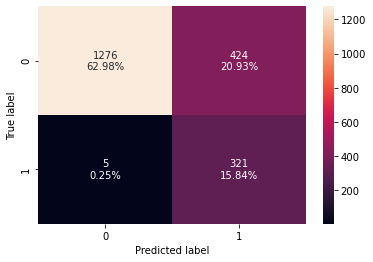

In [180]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(xgboost_un_tu, X_val, y_val)

The model performance is better, Recall is almost the same for Validation but it’s closer to the Train dataset results. Accuracy is doing pretty well, with very similar values. Even if Precision improved significantly, still we have more than a ~8% gap between Train and Validation datasets. The results are meeting the thresholds expectations, Recall > 95% and Acucary as well Precision > 70%. 

In [181]:
# importance of features  ( The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(xgboost_un_tu.feature_importances_, columns = ["Importance"], index = X_val.columns).sort_values(by = 'Importance', ascending = False))


                                Importance
Total_Trans_Ct                    0.127664
Total_Trans_Amt                   0.126961
Total_Ct_Chng_Q4_Q1               0.069697
Avg_Utilization_Ratio             0.068470
Total_Revolving_Bal               0.066620
Card_Category_Gold                0.059136
Total_Amt_Chng_Q4_Q1              0.047893
Income_Category_$80K - $120K      0.045641
Months_on_book                    0.039151
Total_Relationship_Count          0.035745
Contacts_Count_12_mon             0.035447
Months_Inactive_12_mon            0.034800
Education_Level_Doctorate         0.033892
Credit_Limit                      0.032743
Avg_Open_To_Buy                   0.025820
Customer_Age                      0.024430
Marital_Status_Married            0.020443
Card_Category_Silver              0.019076
Dependent_count                   0.018250
Education_Level_Post-Graduate     0.017796
Income_Category_Less than $40K    0.017534
Education_Level_Uneducated        0.016214
Income_Cate

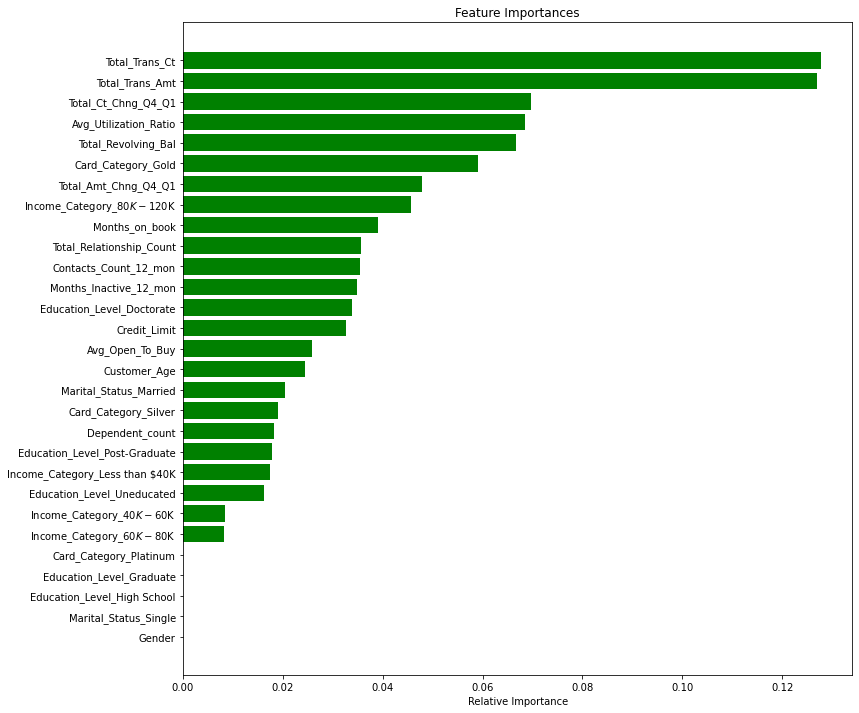

In [182]:
# Visualize the features’ performance 
importances = xgboost_un_tu.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The top important features are Total Transaction Amount in the last 12 months, Total Transaction Count in the last 12 months, revolving balance, Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter, and Average Utilization Ratio. Of course, the results show more but their importance is less. All the top importance features have a very clear relationship to usage, if the usage is high and growing it’s less likely the customer will leave.  

####  AdaBoost Classifier - Undersampled tuned

An AdaBoost Classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.    
Hyperparameters available for improvement of the under sampled Adaboost Classifier model:    
- base_estimator: the base estimator from which the boosted ensemble is built. By default, the base estimator is a decision tree with max_depth=1. max_depth: default=None, the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. We used 1, 2, and 3 as the basic options.     
- n_estimators: the maximum number of estimators at which boosting is terminated. The default value is 50. We have started lower with 10, then 20 and last 50.     
- learning_rate: learning rate shrinks the contribution of each classifier by learning_rate. There is a trade-off between learning_rate and n_estimators. We have shrunk the based on 0.1,0.5 and 0.9.     
- random_state: Random State instance or None, default=None. Controls the random seed given at each base_estimator at each boosting iteration. Thus, it is only used when base_estimator exposes a random_state. Pass an int for reproducible output across multiple function calls. We used the simple option of 1.     
- algorithm:   ‘SAMME’ or  ‘SAMME.R’, the default=’SAMME.R’. If ‘SAMME.R’ then use the SAMME.R real boosting algorithm. base_estimator must support the calculation of class probabilities. If ‘SAMME’ then use the SAMME discrete boosting algorithm. The SAMME.R algorithm typically converges faster than SAMME, achieving a lower test error with fewer boosting iterations. We haven't touched this, so we left the default.  
   
Cross Validation, 10.     

We have optimized the Recall as it was the most important performance metric in our case.  As well we continue to use Random Search during the optimization process as explained before.     
    
The principles were to keep the model simple and small if not necessary to look for other options.    



In [183]:
# Choose the type of classifier. 
adab_un_tu = AdaBoostClassifier(random_state=1)

# Grid of parameters  
parameters = {
    #Let's try base_estimator random_state, max_depth, base_estimator, n_estimators and learning_rate 
    "base_estimator":[DecisionTreeClassifier(max_depth=1, random_state=1),DecisionTreeClassifier(max_depth=2, random_state=1),DecisionTreeClassifier(max_depth=3, random_state=1)],
    "n_estimators": np.arange(10,20,50),
    "learning_rate":np.arange(0.1,0.5,0.9)
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = RandomizedSearchCV(adab_un_tu, parameters, scoring=acc_scorer,cv=10)
grid_obj = grid_obj.fit(X_train_un, y_train_un)

# Set the classifier to the best combination of parameters
adab_un_tu = grid_obj.best_estimator_

# Fit the best algorithm to the data.
adab_un_tu.fit(X_train_un, y_train_un)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [184]:
# Calculating different metrics using the train set
adab_un_tu_model_train_perf = model_performance_classification_sklearn(
    adab_un_tu, X_train_un, y_train_un
)
print("Training performance:")
adab_un_tu_model_train_perf 

Training performance:


Accuracy    Recall  Precision        F1
0  0.916496  0.933402   0.902874  0.917884

In [185]:
# Calculating different metrics using the validation set
adab_un_tu_model_val_perf = model_performance_classification_sklearn(
    adab_un_tu, X_val, y_val
)
print("Validation performance:")
adab_un_tu_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.880553  0.920245   0.581395  0.712589

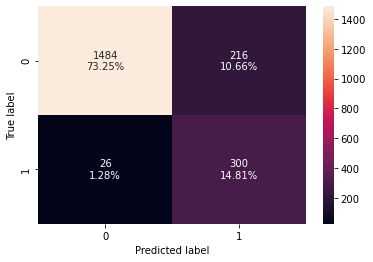

In [186]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(adab_un_tu, X_val, y_val)

We haven't been able to improve the model, it's even degraded from a performance perspective.  
We can see the model is consistent and not overfitting for Recall and Accuracy. But still, the Precision is showing a significant difference.      
Regardless we are not meeting the thresholds expectations, let see the next model results.


In [187]:
# importance of features ( The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(adab_un_tu.feature_importances_, columns = ["Importance"], index = X_val.columns).sort_values(by = 'Importance', ascending = False))


                                Importance
Total_Trans_Ct                    0.368810
Total_Revolving_Bal               0.232189
Total_Trans_Amt                   0.179981
Total_Ct_Chng_Q4_Q1               0.157367
Total_Relationship_Count          0.045436
Customer_Age                      0.013483
Total_Amt_Chng_Q4_Q1              0.002735
Income_Category_$80K - $120K      0.000000
Income_Category_$60K - $80K       0.000000
Education_Level_Post-Graduate     0.000000
Income_Category_$40K - $60K       0.000000
Income_Category_Less than $40K    0.000000
Card_Category_Gold                0.000000
Card_Category_Platinum            0.000000
Marital_Status_Single             0.000000
Marital_Status_Married            0.000000
Education_Level_Uneducated        0.000000
Avg_Utilization_Ratio             0.000000
Education_Level_High School       0.000000
Education_Level_Graduate          0.000000
Education_Level_Doctorate         0.000000
Gender                            0.000000
Avg_Open_To

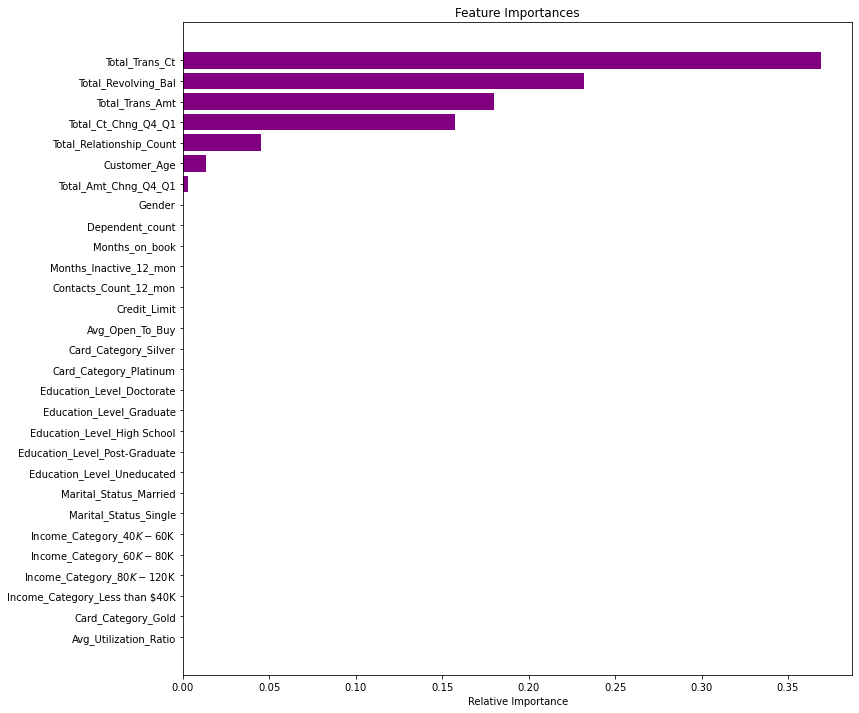

In [188]:
# Visualize the features’ performance 
importances = adab_un_tu.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The most important features are Total Transaction Count in the last 12 months, revolving balance, Total Transaction Amount in the last 12 months, and the ratio of the total transaction count in the 4th quarter, and the total transaction count in the 1st quarter.    
The results show another 3 features influencing the results but far behind.      
Again, we can observe very clearly the credit usage is the best indication to indicate if the customer will leave.    


####  Bagging Classifier - Undersampled tuned

The Bagging Classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their predictions (either by voting or by averaging) to form a final prediction.    
  
The hyperparameters available to optimize the model are below:   
-	base_estimatorobject:  the base estimator to fit on random subsets of the dataset. If None, then the base estimator is the DecisionTreeClassifier.,  default=None.    
-	n_estimators: the maximum number of estimators at which boosting is terminated. We have chosen a few options from 10 to 100 increasing by 10.      
-	warm_startbool: when set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new ensemble. The default=False.  Not used, we left the default.      
-	max_samples: the number of samples to draw from X to train each base estimator (with replacement by default). The default=1.0. We started with a 70% until 100% increasing at a 10% rate.         
-	max_features: the number of features to draw from X to train each base estimator ( without replacement by default). The default=1.0. We started with a 70% until 100% increasing at a 10% rate. 
-	bootstrapbool: whether samples are drawn with replacement. If False, sampling without replacement is performed. The default=True. We have used and left the default.      
-	bootstrap_featuresbool: whether features are drawn with replacement. The default=False. Not used.    
-	oob_scorebool: whether to use out-of-bag samples to estimate the generalization error. Only available if bootstrap=True, the default=False. Not used.       
-	Verbose: controls the verbosity when fitting and predicting. The default=0. Not used.    
-	n_jobsint: the number of jobs to run in parallel for both fit and predict. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors. The default=None. Not used.    
-	random_state: controls the random resampling of the original dataset. If the base estimator accepts a random_state attribute, a different seed is generated for each instance in the ensemble. Pass an int for reproducible output across multiple function calls. RandomState instance or None, default=None. We have used 1.    
   
Cross Validation, 5.     
   
We used the Ramdon Search method to find the best hyperparameters value combinations, we had explained the details before.     
We had optimized with the first try the Recall metric but the results were populating only the 2 quadrants of the confusion matrix. So as a 2nd option we optimized the Accuracy.     
    
As well we were tunning only a few hyperparameters and leaving defaults. Then based on the results it’s possible to change further.    


In [189]:
# Choose the type of classifier. 
bagging_estimator_un_tu = BaggingClassifier(random_state=1 )

# Grid of parameters used
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50,70,80,90,100],
              
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = RandomizedSearchCV(bagging_estimator_un_tu, parameters, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_un, y_train_un)

# Set the classifier to the best combination of parameters
bagging_estimator_un_tu = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_un_tu.fit(X_train_un, y_train_un)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=50,
                  random_state=1)

In [190]:
# Calculating different metrics using the train set
bagging_estimator_un_tu_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_un_tu, X_train_un, y_train_un
)
print("Training performance:")
bagging_estimator_un_tu_model_train_perf

Training performance:


Accuracy  Recall  Precision        F1
0  0.998975     1.0   0.997955  0.998976

In [191]:
# Calculating different metrics using the validation set
bagging_estimator_un_tu_model_val_perf = model_performance_classification_sklearn(
    bagging_estimator_un_tu, X_val, y_val
)
print("Validation performance:")
bagging_estimator_un_tu_model_val_perf

Validation performance:


Accuracy    Recall  Precision        F1
0  0.931885  0.960123   0.714612  0.819372

The tuned model is having the similar gap between Train and Validation datasets results.     
The metrics are showing very good performance,  and are close to meet the threshold expectations: Recall > 95% and Accuracy and Precision > 70%.   


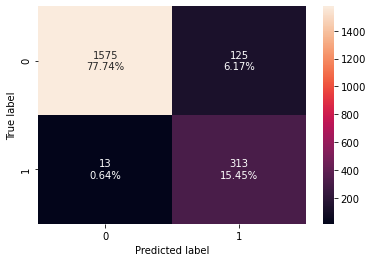

In [192]:
# creating confusion matrix using the validation set
confusion_matrix_sklearn(bagging_estimator_un_tu, X_val, y_val)

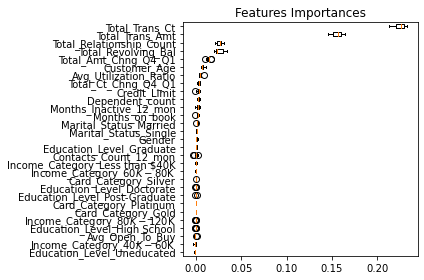

In [193]:
# Importance of features in the bagging classifier building , we compute the mean brought by that features. 

from sklearn.inspection import permutation_importance # Let import the permutation importance function
result_bc = permutation_importance(bagging_estimator_un_tu, X_val, y_val, n_repeats=10,
                                random_state=1)
indices = result_bc.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result_bc.importances[indices].T,
           vert=False, labels=X_val.columns[indices])
ax.set_title("Features Importances")
fig.tight_layout()
plt.show()

The most important features are Total Transaction Count in the last 12 months, Total number of products held by the customer, Revolving balance, Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter, Customer Age, Average utilization ratio, Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter, Number of months inactive in the last 12 months.    
Many of the features have been identified as well as important in other models and relates to credit usage.       
  


### <a name='link11'> Models Performances  </a>

Below we are going to compare and analyze the tuned models. 

In [194]:
# create the tuned models dictionary 

dictt_tu = {
    
" XGBoost Classifier Train - Undersampled tuned ":xgboost_un_tu_model_train_perf.values.tolist()[0],
" XGBoost Classifier Validation - Undersampled tuned":xgboost_un_tu_model_val_perf.values.tolist()[0],
" AdaBoost Classifier Train - Undersampled tuned":adab_un_tu_model_train_perf.values.tolist()[0],
" AdaBoost Classifier Validation - Undersampled tuned":adab_un_tu_model_val_perf.values.tolist()[0],
" Bagging Classifier Train - Undersampled tuned":bagging_estimator_un_tu_model_train_perf.values.tolist()[0],
" Bagging Classifier Validation - Undersampled tuned":bagging_estimator_un_tu_model_val_perf.values.tolist()[0]
    
    
}

In [195]:
comparision_df_tu = pd.DataFrame.from_dict(dictt_tu) # Create a data frame from the dictionary

In [196]:
comparision_df_tu.index = bc__model_train_perf.columns.tolist() # Set up the table

In [197]:
comparision_df_tu # Visualize the table 

XGBoost Classifier Train - Undersampled tuned   \
Accuracy                                          0.894980   
Recall                                            0.995902   
Precision                                         0.828645   
F1                                                0.904607   

            XGBoost Classifier Validation - Undersampled tuned  \
Accuracy                                            0.941264     
Recall                                              0.963190     
Precision                                           0.745843     
F1                                                  0.840696     

            AdaBoost Classifier Train - Undersampled tuned  \
Accuracy                                          0.916496   
Recall                                            0.933402   
Precision                                         0.902874   
F1                                                0.917884   

            AdaBoost Classifier Validation - Undersampled tuned  \
Accuracy                                            0.880553      
Recall                                              0.920245      
Precision                                           0.581395      
F1                                                  0.712589      

            Bagging Classifier Train - Undersampled tuned  \
Accuracy                                         0.998975   
Recall                                           1.000000   
Precision                                        0.997955   
F1                                               0.998976   

            Bagging Classifier Validation - Undersampled tuned  
Accuracy                                            0.931885    
Recall                                              0.960123    
Precision                                           0.714612    
F1                                                  0.819372

In [198]:
print("Tuned Models ")
comparision_df_tu.T # Transpose for better visualization 

Tuned Models 


Accuracy    Recall  \
 XGBoost Classifier Train - Undersampled tuned      0.894980  0.995902   
 XGBoost Classifier Validation - Undersampled t...  0.941264  0.963190   
 AdaBoost Classifier Train - Undersampled tuned     0.916496  0.933402   
 AdaBoost Classifier Validation - Undersampled ...  0.880553  0.920245   
 Bagging Classifier Train - Undersampled tuned      0.998975  1.000000   
 Bagging Classifier Validation - Undersampled t...  0.931885  0.960123   

                                                    Precision        F1  
 XGBoost Classifier Train - Undersampled tuned       0.828645  0.904607  
 XGBoost Classifier Validation - Undersampled t...   0.745843  0.840696  
 AdaBoost Classifier Train - Undersampled tuned      0.902874  0.917884  
 AdaBoost Classifier Validation - Undersampled ...   0.581395  0.712589  
 Bagging Classifier Train - Undersampled tuned       0.997955  0.998976  
 Bagging Classifier Validation - Undersampled t...   0.714612  0.819372

AdaBoost tuned is not meeting the threshold expectations using the train and validation datasets.    
  
Bagging Classifier and XGBoost Undersampled tuned models are meeting thresholds expectation (Recall >95% and Accuracy as well as Precision >70%) so we ran the test dataset as well for these models.   
 

  



In [199]:
# Calculating different metrics on test set, this is the end results 
xgboost_un_tu_model_test_perf = model_performance_classification_sklearn(
    xgboost_un_tu, X_test, y_test
)
print("Test performance XGBoost:")
xgboost_un_tu_model_test_perf

Test performance XGBoost:


Accuracy    Recall  Precision        F1
0  0.786772  0.987692   0.428571  0.597765

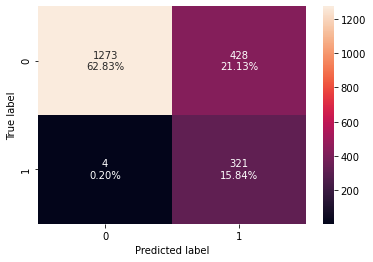

In [200]:
# creating confusion matrix test set
confusion_matrix_sklearn(xgboost_un_tu, X_test, y_test)

In [201]:
# Calculating different metrics on test set, this is the end results 
bagging_estimator_un_tu_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_un_tu, X_test, y_test
)
print("Test performance Bagging Classifier :")
bagging_estimator_un_tu_model_test_perf

Test performance Bagging Classifier :


Accuracy    Recall  Precision        F1
0  0.931885  0.966154   0.712018  0.819843

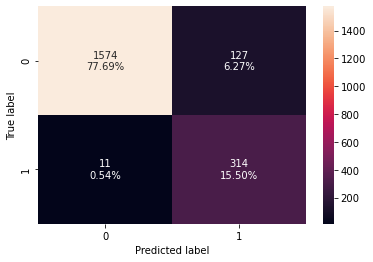

In [202]:
# creating confusion matrix test set
confusion_matrix_sklearn(bagging_estimator_un_tu, X_test, y_test)

Based on the overall performance metrics results the Bagging Classifier Undersampled tuned is performing the best across all datasets and it is consistent, even the Recall is not the highest.     
Bagging Classifier Undersampled tuned Recall is 96% with the Validation dataset, 1 with Train and 95% with Test datasets.    
Accuracy and Precision > 70% across all 3 datasets.         
XGBoost is not meeting the Precision threshold expectations, even the Recall is higher.   
    



### BONUS : Decision tree - Undersampled tuned

We are going to tune another model and check if we can get better results.       
We are going to tune a Decision Tree without handling outliers as part of the data processing as they are not important for Random Forest and Decision Trees.      
If we remember (detailed comparison tables above)  the Decision Tree is performing better (higher Recall, Accuracy, Precision) than Random Forest across train and validation datasets for biased, oversampled, and undersampled scenarios. 


In [203]:
# Create another duplicate dataset for data preprocessing  
bank6 = bank.copy()
bank6.head ()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [204]:
# Data Preprocessing

# Drop Customer number, it is not useful
bank6.drop(['CLIENTNUM'], axis=1, inplace=True)


# Let change Attrition Flag into a numerical value
bank6["Attrition_Flag"] = bank6["Attrition_Flag"].str.replace("Attrited Customer", "1").str.replace("Existing Customer", "0").astype(np.int64)

# Let change Gender into a numerical value
bank6["Gender"] = bank6["Gender"].str.replace("F", "1").str.replace("M", "0").astype(np.int64)

# Let handle Education Level missing values, ensure NaN is captured across the variable records properly
bank6["Education_Level"] = bank6["Education_Level"].str.replace("N/A", "") 

# Let Marital Status handle missing values , ensure NaN is captured across the variable records properly
bank6["Marital_Status"] = bank6["Marital_Status"].str.replace("NaN", "") 
 

# Apply the formula for Education_Level and  Marital_Status with transform method

bank6.Education_Level = imputer_frequent_na.fit_transform(bank6['Education_Level'].values.reshape(-1,1))[:,0]
 
bank6.Marital_Status = imputer_frequent_na.fit_transform(bank6['Marital_Status'].values.reshape(-1,1))[:,0]


# Apply the formula for Income_Category with transform method
bank6.Income_Category = imputer_frequent_abc.fit_transform(bank6['Income_Category'].values.reshape(-1,1))[:,0] 

# Let create dummies for the categorical variables 
bank6 = pd.get_dummies(bank6, columns=["Education_Level", "Marital_Status", "Income_Category", "Card_Category"], drop_first=True)



In [205]:
# Define the predicted variable
x = bank6.drop(["Attrition_Flag"], axis=1)
y = bank6["Attrition_Flag"]

# Splitting data into training, validation and test set, we avoid data leakage :
# first we split data into 2 parts, say temporary and test

X_temp6, X_test6, y_temp6, y_test6 = train_test_split(
    x, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation

X_train6, X_val6, y_train6, y_val6 = train_test_split(
    X_temp6, y_temp6, test_size=0.25, random_state=1, stratify=y_temp6
)


# Perform undersampled
rus6 = RandomUnderSampler(random_state=1) # Applying under-sample method
X_train_un6, y_train_un6 = rus6.fit_resample(X_train6, y_train6)




In [206]:
# How datasets look ?
print(X_train6.shape, X_val6.shape, X_test6.shape, X_train_un6.shape)

(6075, 29) (2026, 29) (2026, 29) (1952, 29)


In [207]:
# Choose the type of classifier
dTree_un_t = DecisionTreeClassifier(random_state=42)

# Grid of parameters used
parameters_t = {'max_depth': np.arange(1,10), 
              'min_samples_leaf': [1, 2, 5, 7, 8],
              'max_leaf_nodes' : [2, 3, 5, 10],
              'min_impurity_decrease': [0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.accuracy_score)

# Run the grid search
grid_obj = RandomizedSearchCV(dTree_un_t, parameters_t, scoring=acc_scorer,cv=5)
grid_obj = grid_obj.fit(X_train_un6, y_train_un6)

# Set the classifier to the best combination of parameters
dTree_un_t = grid_obj.best_estimator_

# Fit the best algorithm to the data
dTree_un_t.fit(X_train_un6, y_train_un6)

DecisionTreeClassifier(max_depth=9, max_leaf_nodes=10,
                       min_impurity_decrease=0.01, random_state=42)

In [208]:
# Calculating different metrics on test set, this is the end results 
dTree_un_t_model_train_perf = model_performance_classification_sklearn(
    dTree_un_t, X_train_un6, y_train_un6
)
print("Train performance Decision Tree Tuned :")
dTree_un_t_model_train_perf

Train performance Decision Tree Tuned :


Accuracy    Recall  Precision        F1
0  0.898566  0.940574   0.867675  0.902655

In [209]:
# Calculating different metrics on test set, this is the end results 
dTree_un_t_model_val_perf = model_performance_classification_sklearn(
    dTree_un_t, X_val6, y_val6 
)
print("Validation performance Decision Tree Tuned :")
dTree_un_t_model_val_perf

Validation performance Decision Tree Tuned :


Accuracy   Recall  Precision        F1
0  0.851431  0.93865   0.521295  0.670318

In [210]:
# Calculating different metrics on test set, this is the end results 
dTree_un_t_model_test_perf = model_performance_classification_sklearn(
    dTree_un_t, X_test6, y_test6
)
print("Test performance Decision Tree Tuned :")
dTree_un_t_model_test_perf

Test performance Decision Tree Tuned :


Accuracy    Recall  Precision        F1
0  0.842547  0.932308      0.505  0.655135

After trying to optimize the Decision Tree using Random Search with different hyperparameters and changing the best estimator criteria from Recall to Precision and Accuracy the results are not giving the expected improvements.      
Recall < 95% , Accuacry > 70% and Pression < 70% Test dataset.      



### <a name='link12'> Productionize the model </a>

In this phase we are going to create a pipeline to deploy the model into production. 

In [211]:
# Create another duplicate dataset for the pipeline creation
bank4 = bank.copy()
bank4.head ()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School            NaN  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0              39  ...                       1                      3   
1              44  ...                       1                      2   
2              36  ...                       1                      0   
3              34  ...                       4                      1   
4              21  ...                       1                      0   

   Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0       12691.0                  777          11914.0                 1.335   
1        8256.0                  864           7392.0                 1.541   
2        3418.0                    0           3418.0                 2.594   
3        3313.0                 2517            796.0                 1.405   
4        4716.0                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000  

[5 rows x 21 columns]

In [212]:
# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder

# creating a list of numerical variables
numerical_features = [
     'Customer_Age', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

# creating a transformer for numerical variables, which will apply simple imputer on the numerical variables
numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median"))])


# creating a list of categorical variables
categorical_features = ['Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category']

# creating a transformer for categorical variables, which will first apply simple imputer and 
#then do one hot encoding for categorical variables
categorical_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)
# handle_unknown = "ignore", allows model to handle any unknown category in the test data

# combining categorical transformer and numerical transformer using a column transformer

preprocessor = ColumnTransformer(
    transformers=[
        ("numerical ", numeric_transformer, numerical_features),
        ("categorical", categorical_transformer, categorical_features),
    ],
    remainder="drop",
)
# remainder = "drop" has been used, it will drop the variables that are not present in "numerical_features" 
# and "categorical_features" 



In [213]:
# Separating target variable and other variables
X = bank4.drop(columns="Attrition_Flag")
Y = bank4["Attrition_Flag"]

In [214]:
# CLIENTNUM consists of uniques ID for clients and hence will not add value to the modeling
X.drop(["CLIENTNUM"], axis=1, inplace=True)

In [215]:
# Replace abc with NaN so the numerical imputer can handle it 
X["Income_Category"].replace("abc", np.nan, inplace=True)

In [216]:
## Encoding Existing and Attrited customers to 0 and 1 respectively, for analysis.
Y.replace("Existing Customer", 0, inplace=True)
Y.replace("Attrited Customer", 1, inplace=True)

In [217]:
# Splitting the data into train and test sets
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)
print(X_train_p.shape, X_test_p.shape)

(7088, 19) (3039, 19)


In [218]:
rus = RandomUnderSampler(random_state=1)
X_train_un_p, y_train_un_p = rus.fit_resample(X_train_p, y_train_p)

In [219]:
# Creating new pipeline with best parameters
model_bank = Pipeline(
    steps=[
        ("pre", preprocessor),
         (
            "BaggingClassifier undersampled tuned",
            BaggingClassifier (
                max_features=0.7, 
                max_samples=0.7, 
                n_estimators=50,
                random_state=1,
            ),
        ),
    ]
)
 

In [220]:
# Fit the model on training data
model_bank.fit(X_train_un_p , y_train_un_p )

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('numerical ',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  ['Customer_Age',
                                                   'Months_on_book',
                                                   'Total_Relationship_Count',
                                                   'Months_Inactive_12_mon',
                                                   'Contacts_Count_12_mon',
                                                   'Credit_Limit',
                                                   'Total_Revolving_Bal',
                                                   'Avg_Open_To_Buy',
                                                   'Total_Amt_Chng_Q4_Q1',
                                                   'Total_Trans_Amt',
      

In [221]:
# Validate the pipe
y_pred = model_bank.predict(X_test_p)

In [222]:
# Calculating different metrics on pipeline test set 
pipeline_perf = model_performance_classification_sklearn(
   model_bank , X_test_p, y_test_p
)
print("Test performance Pipeline :")
pipeline_perf

Test performance Pipeline :


Accuracy   Recall  Precision        F1
0  0.929911  0.95082   0.710567  0.813322

### <a name='link13'> Conclusions and wrap up </a>

The most important features are Total Transaction Count in the last 12 months, Revolving balance, Total number of products held by the customer, Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter, Customer Age, Average utilization ratio, Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter, Number of months inactive in the last 12 months.     
The majority of the important features indicating if a customer will drop the credit card are related to usage, usage growth, and his/ her relationship with the bank. Age is the exception. The rest of the features influencing are less important with marginal impact, another exception is Gender, the principle of usage repeats itself.    


#### Business Recommendations  

1) Usage and its growth are the main prediction vectors: Total Transaction Count in the last 12 months, Revolving balance, Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter, Average utilization ratio, Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter. So, the bank needs to provide programs to make the usage of the credit card more attractive:   
     - Membership points for reimbursement as USD, the higher the usage the points increase even more in a non-linear manner. Apply different scales for the number of transactions vs. transaction amounts.         
     - Identify the shops and businesses with higher volume (transactions and amounts) and close promotion deals with them so the customers will be tempted to use the bank credit cards for the transactions and/ or increase the spending.       
     - Surprise customers with "lottery" promotions, the customer won’t pay the monthly bill (free of charge!!) in case his/ her credit card is "winning" the monthly "lottery".  If the winners will allow making it public on social media monthly.        
     - Customers with a high utilization ratio,  offer to them financing options, this as well can allow the bank to sell another product as a loan.       
2) The total number of products a customer hold is one of the important factors to predict credit card attrition: the bank can customize the services packages to be comprehensive end to end, offering a family of products with attractive conditions and credit cards as one of those.    
3) Number of months inactive in the last 12 months Credit card months of inactivity are another warning indication about the probability of a customer leaving the credit card. So inactive credit card holders can be contacted by telemarketing teams to offer them attractive discounts in the shops they had historically purchased before, on top of the above options.     
4) Age is a factor predicting attrition but to a lower extent. Older customers can be offered special services to make credit card management easier for them, e.g., free video calls to manage the internet services or answer queries.    
5) Last based on the customer profiling results, even upgraded credit card users are a small minority their spending is ~60% higher so always in the recommendations above we should provide better promotions to them.   
